# Sales Analysis Project

#### Import Libraries

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.dates import MonthLocator, num2date  # Corrected import
from matplotlib.ticker import FuncFormatter
import datetime
import os
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20, 10

#### Check Current Directory

In [21]:
print(os.getcwd())

C:\Users\pmgho\Downloads\Prajwal Sales Data Project


#### Change the directory

In [22]:
os.chdir('C:\\Users\\pmgho\\Downloads\\Prajwal Sales Data Project\\')
print(os.getcwd())

C:\Users\pmgho\Downloads\Prajwal Sales Data Project


#### Read Sales Data, display top 5 records

In [23]:
sales_train_df=pd.read_csv('train.csv')
display(sales_train_df.head())
# Almost a million observation
# 1115 unique store
# Note that sales is the target variable (that's what we are trying to predict)
# Id: transaction ID (combination of Store and date)
# Store: unique store Id
# Sales: sales/day, this is the target variable
# Customers: number of customers on agiven day
# Open: Boolean to say whether a store is open or closed (0 = closed, 1 = open)
# Promo: describes if store is running a promo on that day or not
# StateHoliday: indicate which state holiday (a=public holiday,b=Easter holiday, c= Christmas, 0= None)
# SchoolHoliday: indicates if the (Store, Date) was affected by the cluster of public schools

C:\Users\pmgho\AppData\Local\Temp\ipykernel_11220\2067697257.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  sales_train_df=pd.read_csv('train.csv')


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


#### Display the shape (number of rows and columns)

In [24]:
display(sales_train_df.shape)

(1017209, 9)

#### Display the bottom 5 records

In [25]:
display(sales_train_df.tail())

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


#### Data Frame Details

In [26]:
display(sales_train_df.info()) 
# 9 columns in total
# 8 features, each containing 1017209 data points
# 1 target variable (sales)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


None

#### Describe Sales Data Frame

In [28]:
display(sales_train_df.describe())
# Average sales amount per day = 5773 Euros, minimum sales per day = 0, maximum sales per day = 41551
# Average number of customers = 633 perday, minimum number of customers = 0, maximum number of customers = 7388

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


#### Import Store Date

In [30]:
store_info_df=pd.read_csv('store.csv')
display(store_info_df.head())
# StoreType: categarical variable to indicate type of store (a,b,c,d)
# Assortment: describes an assortment level: a = basic, b = extra, c = extended
# CompetitionDistance (meters): distance to closest competitor store
# CompetitionOpenSince [Month/Year]: provide an estimate of the date when competition was open
# Promo2: Promo2 is a continuing and consecutive promotion for some stores - Check is the store participate additional promotions (0 = store is not participating, 1= store is participating)
# Promo2Since [Year/Week]: Date when the store started participating in Promo2
# PromoInterval: Duration of promo in months. Describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew.
# E.g. "Feb,May,Aug,Nov" means each round starts in February,May,August,November of any given year for that store.

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


#### Display the shape (number of rows and columns)

In [31]:
display(store_info_df.shape)

(1115, 10)

#### Store Data Details -Info

##### This Dataframe only include information about the unique 1115 stores that are part of this study

In [32]:
display(store_info_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


None

#### Store Data Details -Describe

In [34]:
display(store_info_df.describe())
# on average, the competition distance is 5404 meters away (5.4 kms)

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


# EXPLORE DATASET

## EXPLORE SALES DATA

#### Check number of Null record

In [35]:
print(sales_train_df.isna().sum())

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64


#### Plot Missing Data - Heat Map to check missing data, in this case no graph create, no missing data

##### Check if any missing data with seaborn heat map
##### sns.heatmap(sales_train_df.isnull(),yticklabels=False,cbar(Colour bar)=False,cmap='Blues')

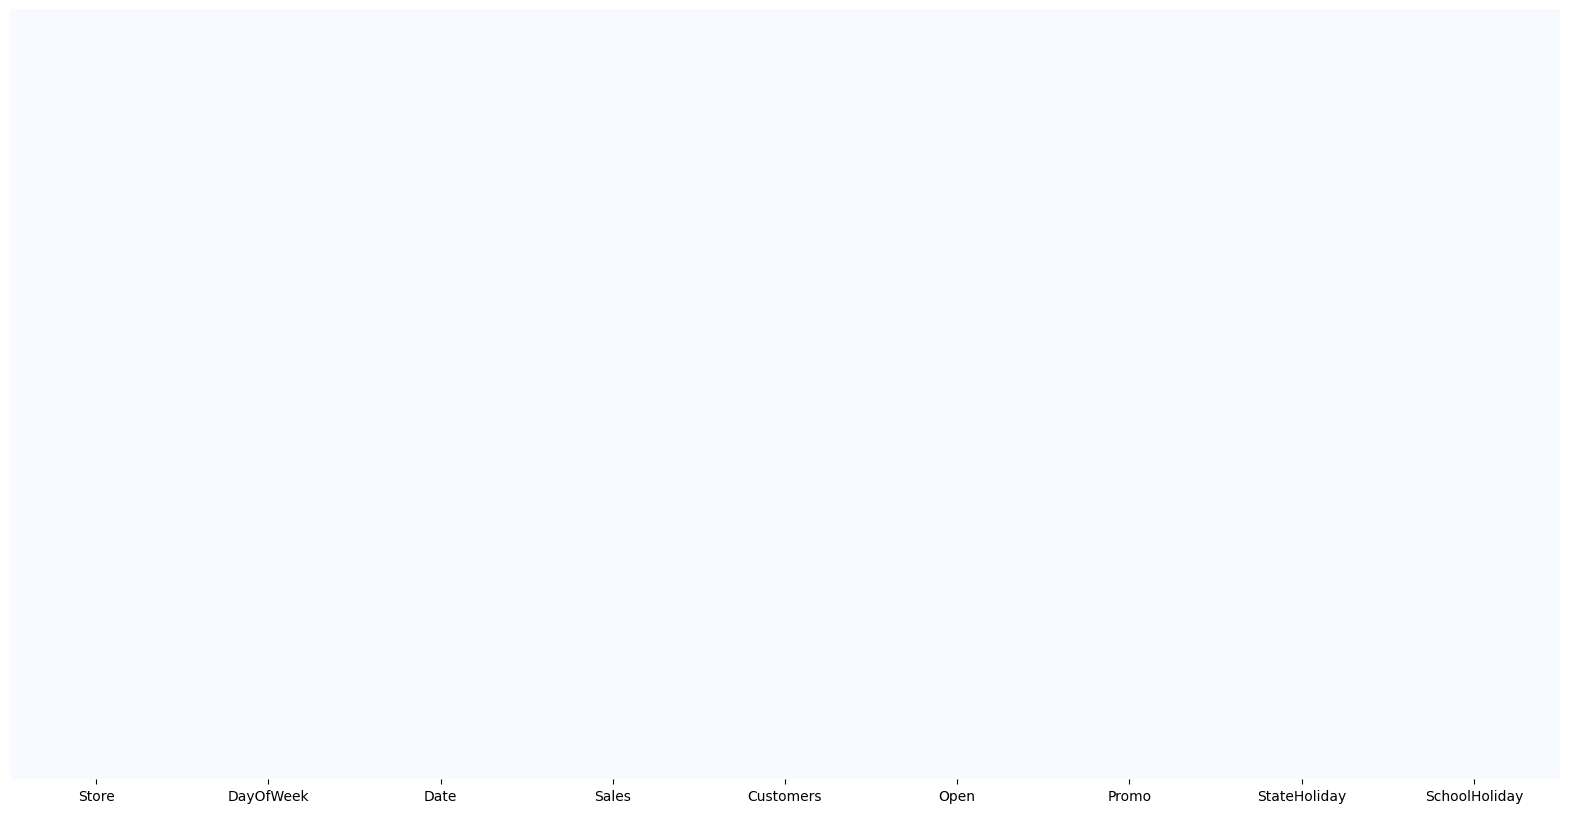

In [38]:
sns.heatmap(sales_train_df.isnull(),yticklabels=False,cbar=False,cmap='Blues')
plt.show()

#### Create Histogram of sales data. Histogram created for numeric columns 

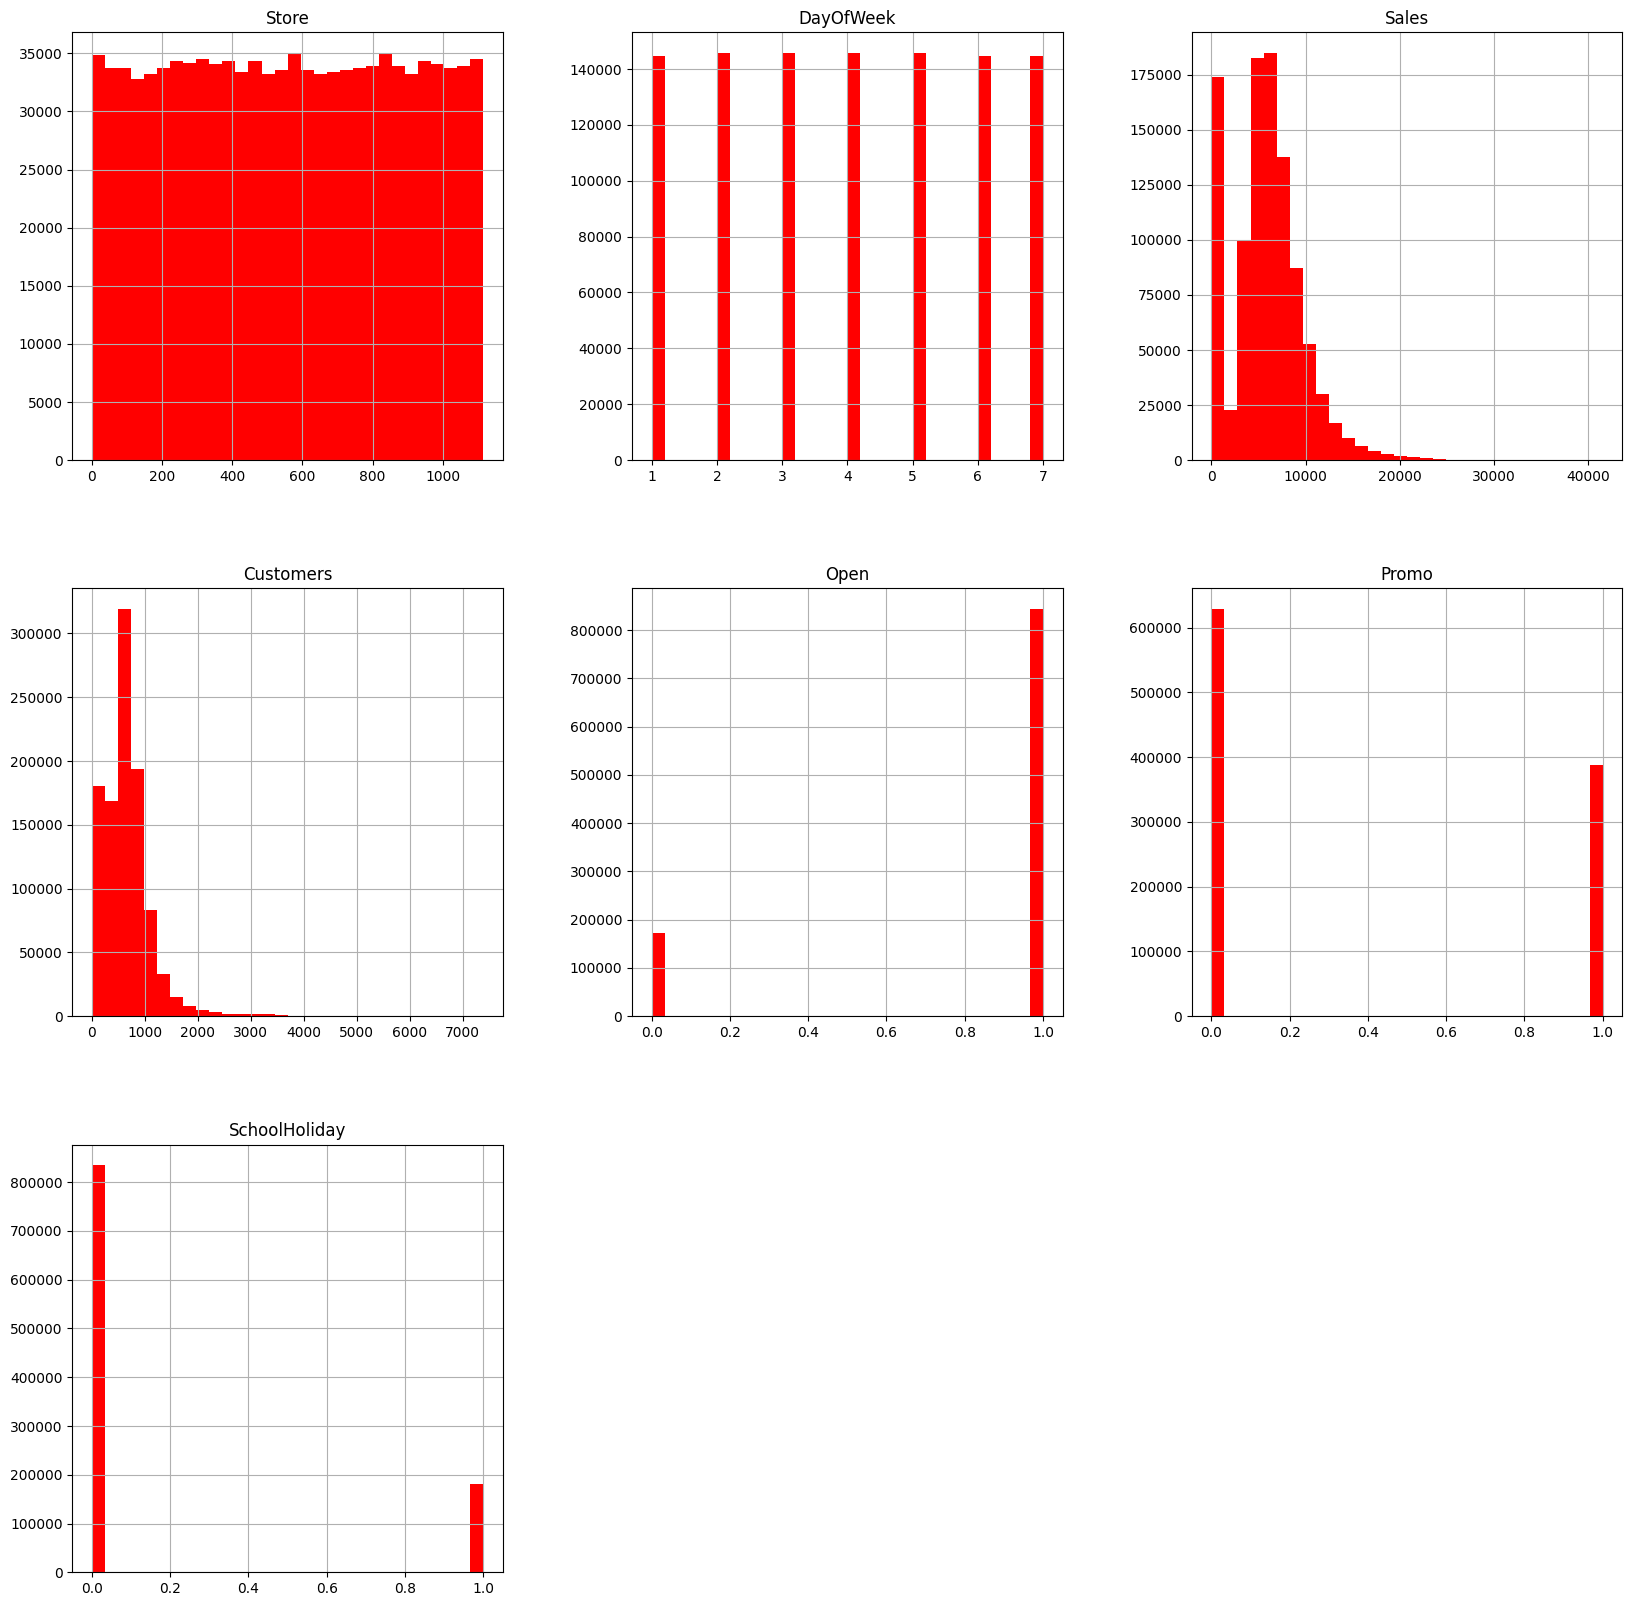

In [39]:
sales_train_df.hist(bins=30,figsize=(20,20),color='r')
plt.show()

#### Few observations from Histogram

In [ ]:
# Average 600 customers per day, maximum is 4500
# Data is equally distributed across various Days of the week (~150000 observations x 7 day = ~1.1 million observation)
# Stores are open ~80% of the time
# Data is equally distributed among all stores (no bias)
# Promo #1 was running ~40% of the time
# Average sales around 5000-6000
# School hoilydays are around ~18% of the time

#### Maximum number of customers in a store in a day.

In [40]:
display(sales_train_df['Customers'].max())

7388

#### Number of stores open or closed

In [42]:
closed_train_df=sales_train_df[sales_train_df['Open']==0]
open_train_df=sales_train_df[sales_train_df['Open']==1]

#### Count the number of stores that are open and closed

In [43]:
print('Total=',len(sales_train_df))
print('Number of closed stores=',len(closed_train_df))
print('Number of open stores=',len(open_train_df))

Total= 1017209
Number of closed stores= 172817
Number of open stores= 844392


In [44]:
172817+844392

1017209

#### Remove closed store sales records

##### Only keep open stores and remove closed stores, since there no sales for closed stores, sales are 0 for closed store

In [45]:
sales_train_df=sales_train_df[sales_train_df['Open']==1]

#### Display the data after removing closed store data

In [46]:
display(sales_train_df)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1016776,682,2,2013-01-01,3375,566,1,0,a,1
1016827,733,2,2013-01-01,10765,2377,1,0,a,1
1016863,769,2,2013-01-01,5035,1248,1,0,a,1
1017042,948,2,2013-01-01,4491,1039,1,0,a,1


#### Drop the open column since it has no meaning now

In [48]:
sales_train_df.drop(['Open'],axis=1,inplace=True)
display(sales_train_df)

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,0,1
1,2,5,2015-07-31,6064,625,1,0,1
2,3,5,2015-07-31,8314,821,1,0,1
3,4,5,2015-07-31,13995,1498,1,0,1
4,5,5,2015-07-31,4822,559,1,0,1
...,...,...,...,...,...,...,...,...
1016776,682,2,2013-01-01,3375,566,0,a,1
1016827,733,2,2013-01-01,10765,2377,0,a,1
1016863,769,2,2013-01-01,5035,1248,0,a,1
1017042,948,2,2013-01-01,4491,1039,0,a,1


#### Describe the data

In [50]:
display(sales_train_df.describe())
# Average sales = 6955 average number of customers = 762 (went up)

,Store,DayOfWeek,Sales,Customers,Promo,SchoolHoliday
count,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000
mean,558.422920,3.520361,6955.514291,762.728395,0.446352,0.193580
std,321.731914,1.723689,3104.214680,401.227674,0.497114,0.395103
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,280.000000,2.000000,4859.000000,519.000000,0.000000,0.000000
50%,558.000000,3.000000,6369.000000,676.000000,0.000000,0.000000
75%,837.000000,5.000000,8360.000000,893.000000,1.000000,0.000000
max,1115.000000,7.000000,41551.000000,7388.000000,1.000000,1.000000


# EXPLORE STORES INFORMATION DATA

#### Check missing data

In [51]:
display(store_info_df.isna().sum())

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

#### Heat Map to check missing Data

##### Check missing data in the store information dataframe

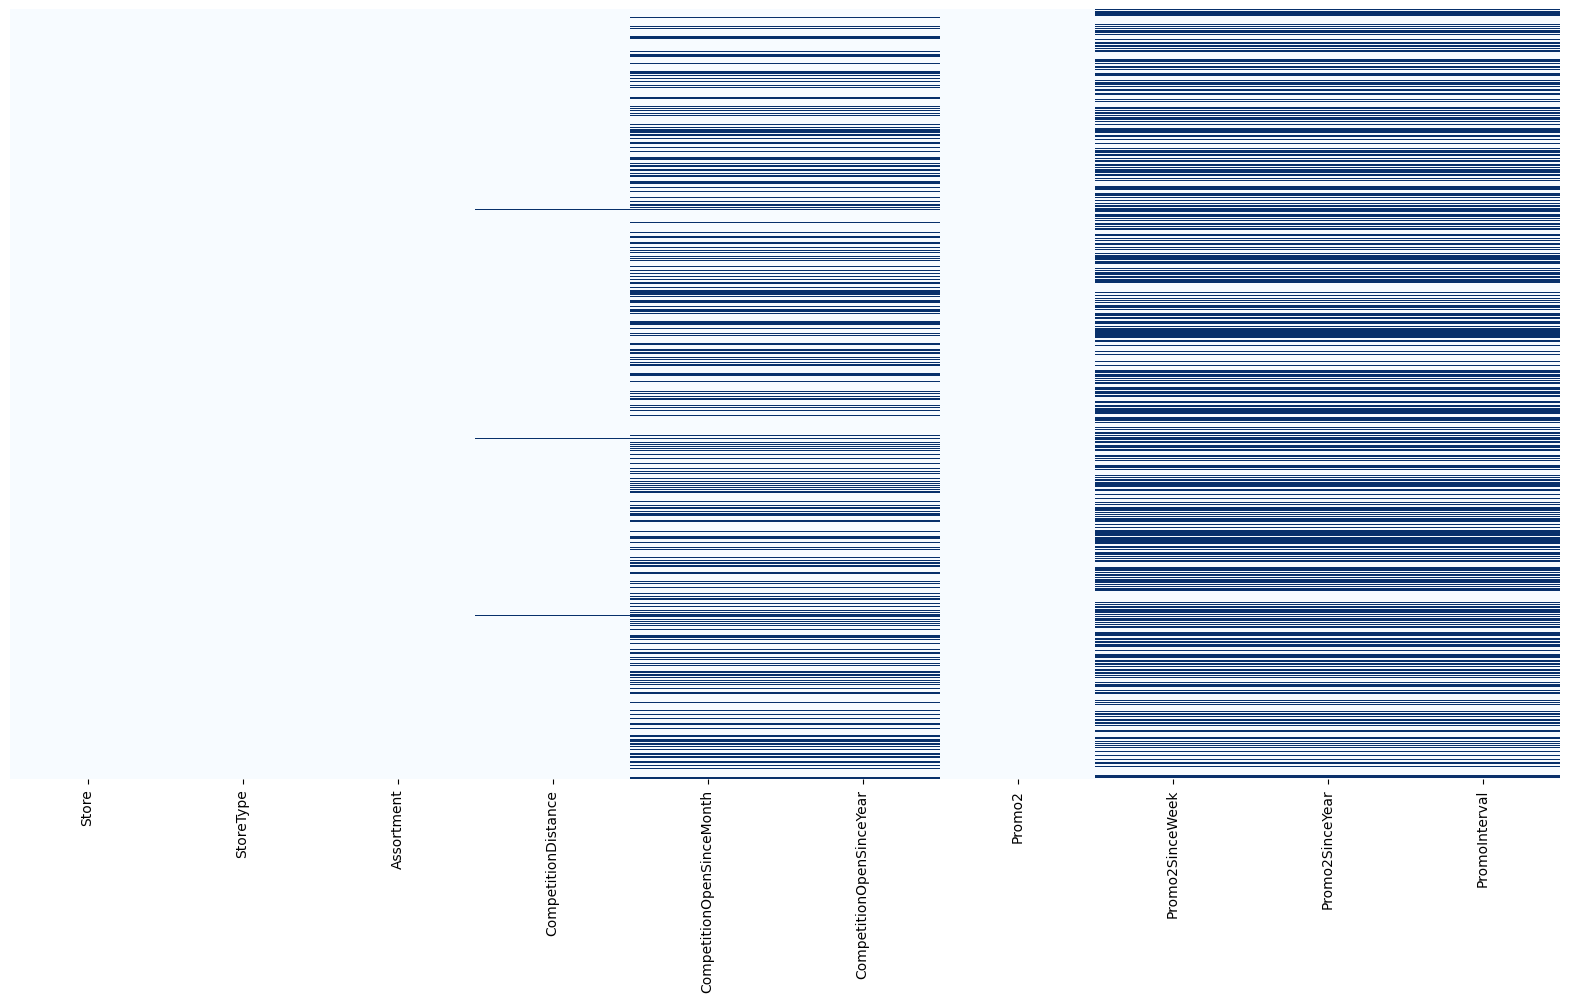

In [52]:
sns.heatmap(store_info_df.isnull(),yticklabels=False,cbar=False,cmap='Blues')
plt.show()

#### Display Records with missing column - Column - CompetitionDistance

##### Display records with missing values in the 'CompetitionDistance' column
##### Only 3 rows are missing

In [53]:
display(store_info_df[store_info_df['CompetitionDistance'].isnull()])

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
621,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
878,879,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"


#### Display Records with missing column - Column - CompetitionOpenSinceMonth

##### Display records with missing values in the 'CompetitionOpenSinceMonth' column
##### Many rows are missing = 354 (almost one third of the 1115 stores)

In [55]:
display(store_info_df[store_info_df['CompetitionOpenSinceMonth'].isnull()])

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
11,12,a,c,1070.0,NaN,NaN,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
12,13,d,a,310.0,NaN,NaN,1,45.0,2009.0,"Feb,May,Aug,Nov"
15,16,a,c,3270.0,NaN,NaN,0,NaN,NaN,NaN
18,19,a,c,3240.0,NaN,NaN,1,22.0,2011.0,"Mar,Jun,Sept,Dec"
21,22,a,a,1040.0,NaN,NaN,1,22.0,2012.0,"Jan,Apr,Jul,Oct"
...,...,...,...,...,...,...,...,...,...,...
1095,1096,a,c,1130.0,NaN,NaN,1,10.0,2014.0,"Mar,Jun,Sept,Dec"
1099,1100,a,a,540.0,NaN,NaN,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


#### Display all records with Promo2 = 0

In [57]:
display(store_info_df[store_info_df['Promo2']==0])
# It seems like if 'promo2' is zero, 'promo2SinceWeek', 'Promo2SinceYear', and 'Promolnterval' information is set to zero

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1107,1108,a,a,540.0,4.0,2004.0,0,NaN,NaN,NaN
1109,1110,c,c,900.0,9.0,2010.0,0,NaN,NaN,NaN
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN


#### Disaply Records with missing column - Column - CompetitionOpenSincYear 

In [59]:
# Display records with missing values in the 
# column 'CompetitionOpenSinceYear No of records 354'
display(store_info_df[store_info_df['CompetitionOpenSinceYear'].isnull()])

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
11,12,a,c,1070.0,NaN,NaN,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
12,13,d,a,310.0,NaN,NaN,1,45.0,2009.0,"Feb,May,Aug,Nov"
15,16,a,c,3270.0,NaN,NaN,0,NaN,NaN,NaN
18,19,a,c,3240.0,NaN,NaN,1,22.0,2011.0,"Mar,Jun,Sept,Dec"
21,22,a,a,1040.0,NaN,NaN,1,22.0,2012.0,"Jan,Apr,Jul,Oct"
...,...,...,...,...,...,...,...,...,...,...
1095,1096,a,c,1130.0,NaN,NaN,1,10.0,2014.0,"Mar,Jun,Sept,Dec"
1099,1100,a,a,540.0,NaN,NaN,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


#### Display Records with missing values in column - CompetitionOpenSinceMonth

In [60]:
# Display records with missing values in the column 'CompetitionOpenSinceMonth No of records 354'
display(store_info_df[store_info_df['CompetitionOpenSinceMonth'].isnull()])

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
11,12,a,c,1070.0,NaN,NaN,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
12,13,d,a,310.0,NaN,NaN,1,45.0,2009.0,"Feb,May,Aug,Nov"
15,16,a,c,3270.0,NaN,NaN,0,NaN,NaN,NaN
18,19,a,c,3240.0,NaN,NaN,1,22.0,2011.0,"Mar,Jun,Sept,Dec"
21,22,a,a,1040.0,NaN,NaN,1,22.0,2012.0,"Jan,Apr,Jul,Oct"
...,...,...,...,...,...,...,...,...,...,...
1095,1096,a,c,1130.0,NaN,NaN,1,10.0,2014.0,"Mar,Jun,Sept,Dec"
1099,1100,a,a,540.0,NaN,NaN,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


#### Update Null Columns with 0

In [64]:
# There are 354 rows where 'CompetitionOpenSinceYear' and 'CompetitionOpenSinceMonth' is missing
# Update the following columns to zeros, if null
str_cols=['Promo2SinceWeek','Promo2SinceYear','PromoInterval','CompetitionOpenSinceYear','CompetitionOpenSinceMonth']
for str in str_cols:
    store_info_df[str].fillna(0,inplace=True)

C:\Users\pmgho\AppData\Local\Temp\ipykernel_11220\4135687987.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  store_info_df[str].fillna(0,inplace=True)


#### Check for NULL values

In [65]:
display(store_info_df.isna().sum())

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          3
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

#### Create heat map to check for NULL values

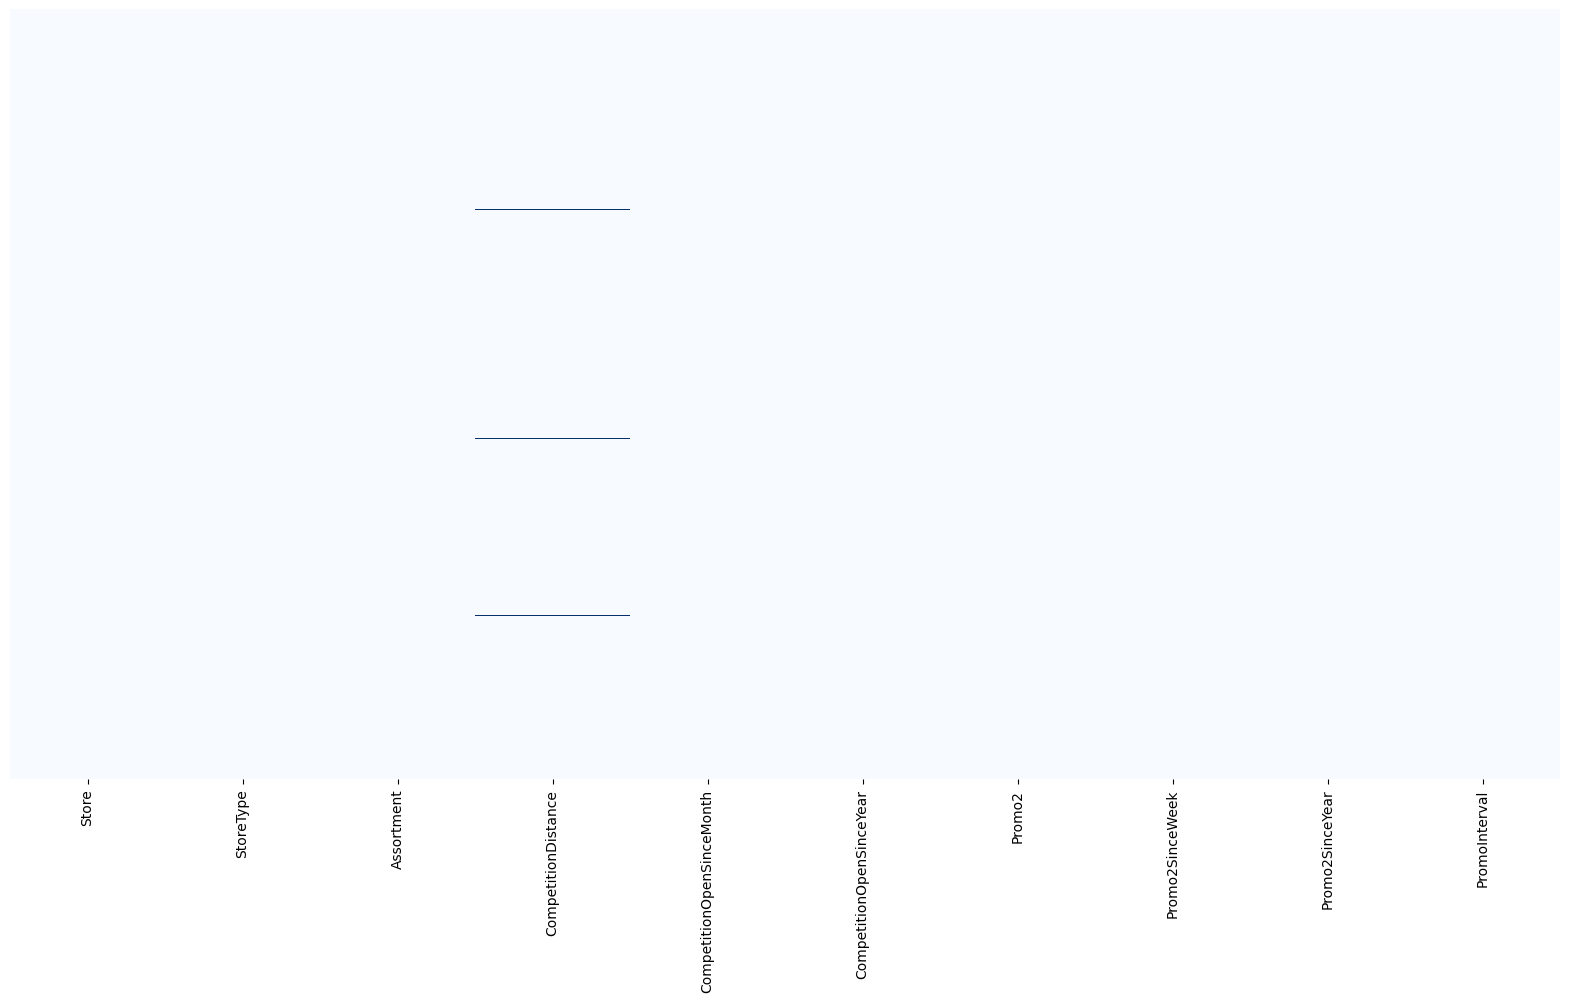

In [67]:
sns.heatmap(store_info_df.isnull(),yticklabels=False,cbar=False,cmap='Blues')
plt.show()

#### Missing Values column -CompetitionDistance

##### There are 3 rows with 'CompetitionDistance' values missing, let's fill them up with with average values of the 'CompetitionDistance' column

In [69]:
store_info_df['CompetitionDistance'].fillna(store_info_df['CompetitionDistance'].mean(),inplace=True)

C:\Users\pmgho\AppData\Local\Temp\ipykernel_11220\2880888126.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  store_info_df['CompetitionDistance'].fillna(store_info_df['CompetitionDistance'].mean(),inplace=True)


#### Check for NUll values

In [70]:
display(store_info_df.isna().sum())

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

#### Create heat map to check for NULL values

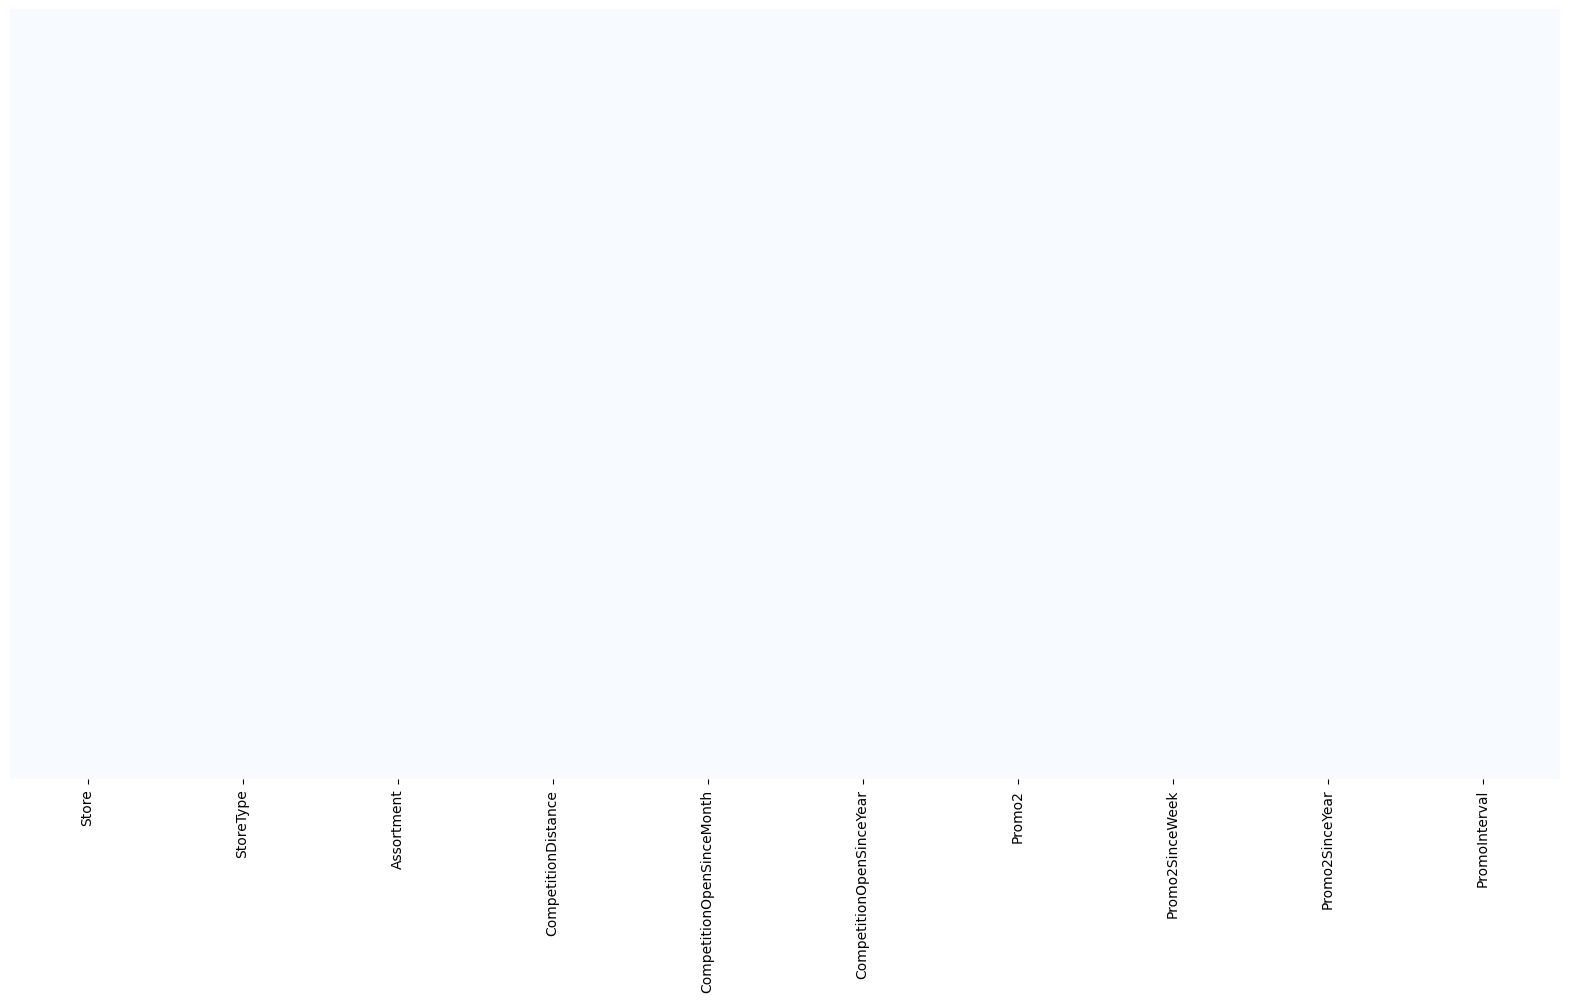

In [71]:
sns.heatmap(store_info_df.isnull(),yticklabels=False,cbar=False,cmap='Blues')
plt.show()

#### Create histogram to View Data

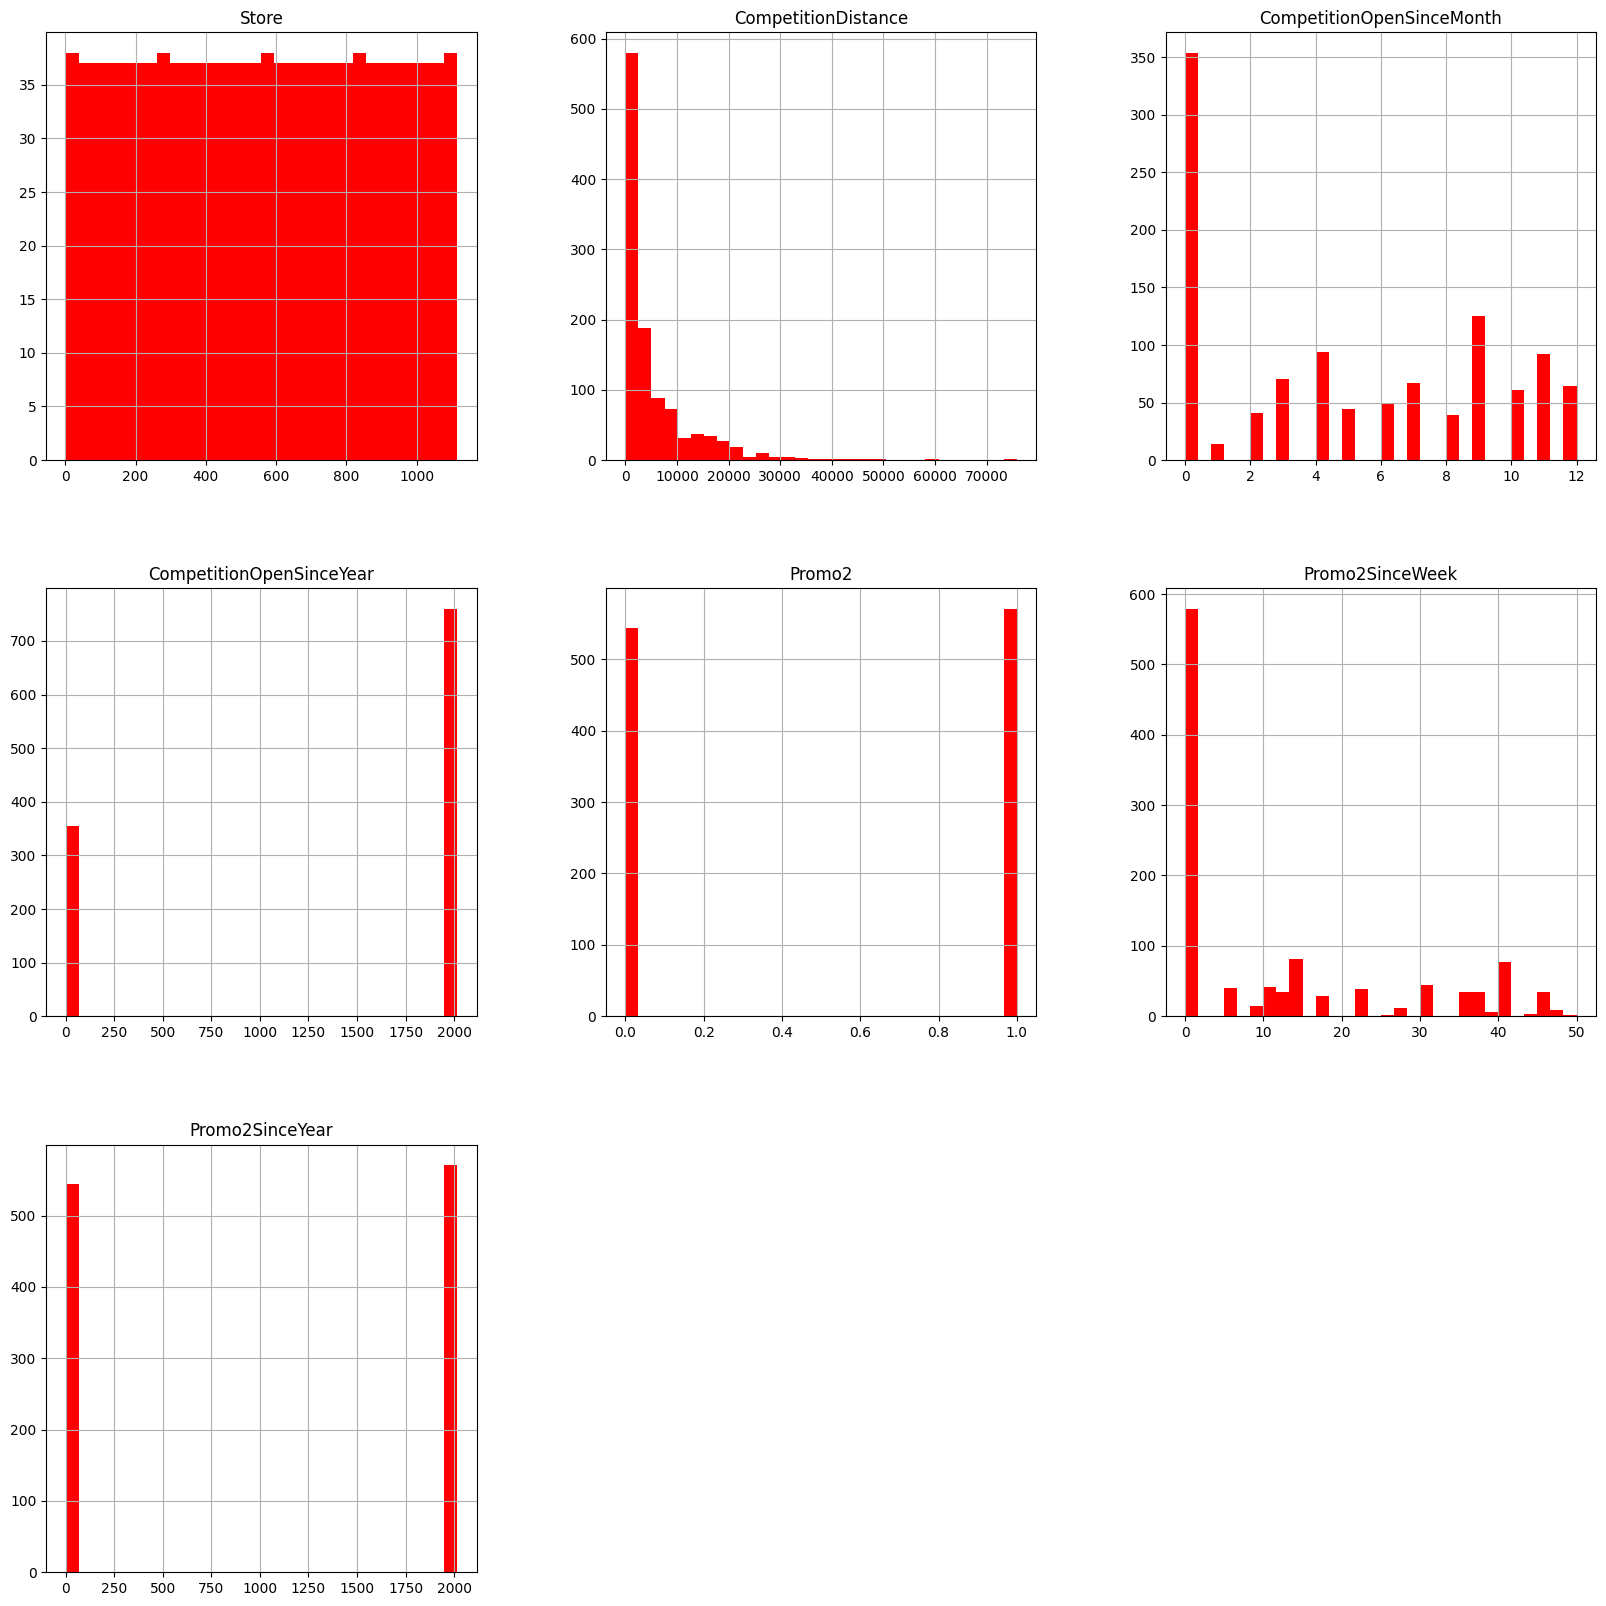

In [73]:
store_info_df.hist(bins=30,figsize=(20,20),color='r')
plt.show()

# half of stores are involved in promo 2
# half of the stores have their competition at a distance of 0-3000m (3 kms away)

# EXPLORE MERGED DATSET

#### Merge Both Data Frames

In [74]:
# Let's merge both data frames together based on 'store'
sales_train_all_df=pd.merge(sales_train_df,store_info_df,how='inner',on='Store')

#### Display Merged Data Frame

In [76]:
# Create .csv file with merged data set
sales_train_all_df.to_csv('merged_test.csv',index=False)

#### Create .csv file with merged data set

In [77]:
sales_train_all_df.to_csv('merged_test.csv',index=False)

#### Create corelation with Sales Columns

In [81]:
numeric_df = sales_train_all_df.select_dtypes(include=[np.number])

In [83]:
correlations = numeric_df.corr()['Sales'].sort_values()
print(correlations)
# Customers and promo are positively correlated with the sales.
# Promo2 does not seem to be effective at all

DayOfWeek                   -0.178736
Promo2SinceYear             -0.127621
Promo2                      -0.127596
Promo2SinceWeek             -0.058476
CompetitionDistance         -0.036343
CompetitionOpenSinceMonth   -0.018370
CompetitionOpenSinceYear     0.005266
Store                        0.007710
SchoolHoliday                0.038617
Promo                        0.368145
Customers                    0.823597
Sales                        1.000000
Name: Sales, dtype: float64


#### Create heat Map to check co relation

In [86]:
numeric_df = sales_train_all_df.select_dtypes(include=[np.number])

In [87]:
correlations = numeric_df.corr()

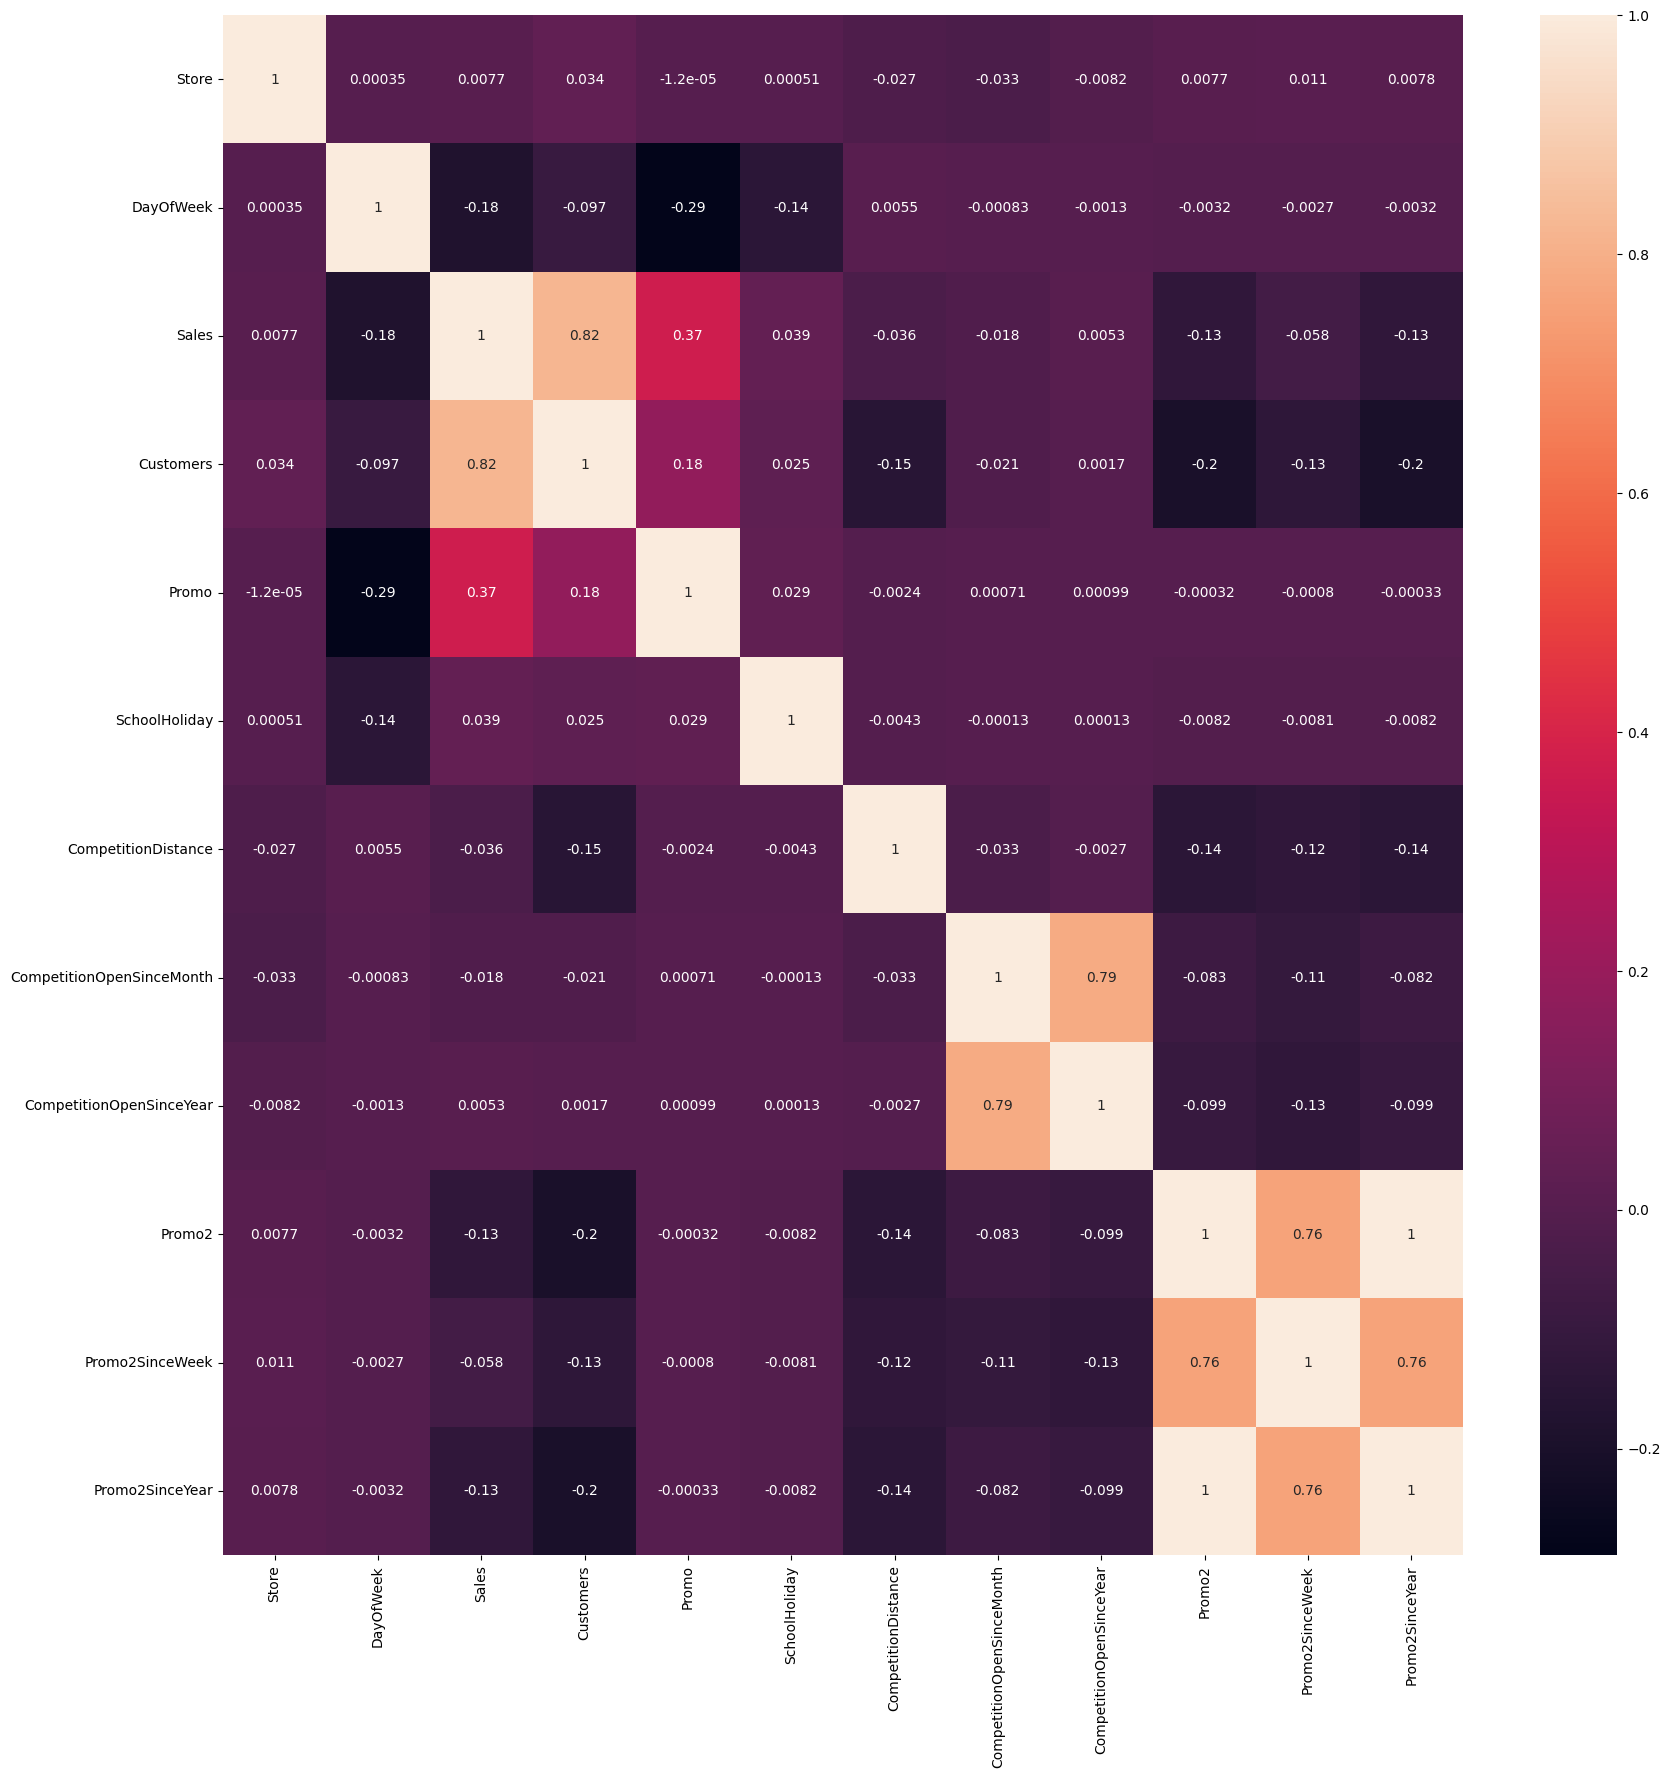

In [88]:
f, ax = plt.subplots(figsize=(20, 20))  # Fix the typo: "figusize" -> "figsize"
sns.heatmap(correlations, annot=True, ax=ax)
plt.show()

#### Customers/Promo2 and sales are strongly correlated

#### Extract Year from Data Column

##### Separate the year from the data column and put it into a separate column

In [89]:
sales_train_all_df['Year']=pd.DatetimeIndex(sales_train_all_df['Date']).year
display(sales_train_all_df)

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year
0,1,5,2015-07-31,5263,555,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015
1,2,5,2015-07-31,6064,625,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015
2,3,5,2015-07-31,8314,821,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015
3,4,5,2015-07-31,13995,1498,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,0,2015
4,5,5,2015-07-31,4822,559,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844387,682,2,2013-01-01,3375,566,0,a,1,b,a,150.0,9.0,2006.0,0,0.0,0.0,0,2013
844388,733,2,2013-01-01,10765,2377,0,a,1,b,b,860.0,10.0,1999.0,0,0.0,0.0,0,2013
844389,769,2,2013-01-01,5035,1248,0,a,1,b,b,840.0,0.0,0.0,1,48.0,2012.0,"Jan,Apr,Jul,Oct",2013
844390,948,2,2013-01-01,4491,1039,0,a,1,b,b,1430.0,0.0,0.0,0,0.0,0.0,0,2013


#### Extract Month and Day Column

##### Same way extract month and day column,add as separate columns

In [92]:
sales_train_all_df['Month']=pd.DatetimeIndex(sales_train_all_df['Date']).month
sales_train_all_df['Day']=pd.DatetimeIndex(sales_train_all_df['Date']).day
display(sales_train_all_df)

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day
0,1,5,2015-07-31,5263,555,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,31
1,2,5,2015-07-31,6064,625,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31
2,3,5,2015-07-31,8314,821,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31
3,4,5,2015-07-31,13995,1498,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,0,2015,7,31
4,5,5,2015-07-31,4822,559,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0,2015,7,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844387,682,2,2013-01-01,3375,566,0,a,1,b,a,150.0,9.0,2006.0,0,0.0,0.0,0,2013,1,1
844388,733,2,2013-01-01,10765,2377,0,a,1,b,b,860.0,10.0,1999.0,0,0.0,0.0,0,2013,1,1
844389,769,2,2013-01-01,5035,1248,0,a,1,b,b,840.0,0.0,0.0,1,48.0,2012.0,"Jan,Apr,Jul,Oct",2013,1,1
844390,948,2,2013-01-01,4491,1039,0,a,1,b,b,1430.0,0.0,0.0,0,0.0,0.0,0,2013,1,1


#### Average Sales by Month

In [ ]:
# Let's take a look at the average sales per month
# 'groupby' works greate by grouping all the data that share the same month column, then obtain the mean of the sales column
# It Looks like sales peak around christmas timeframe

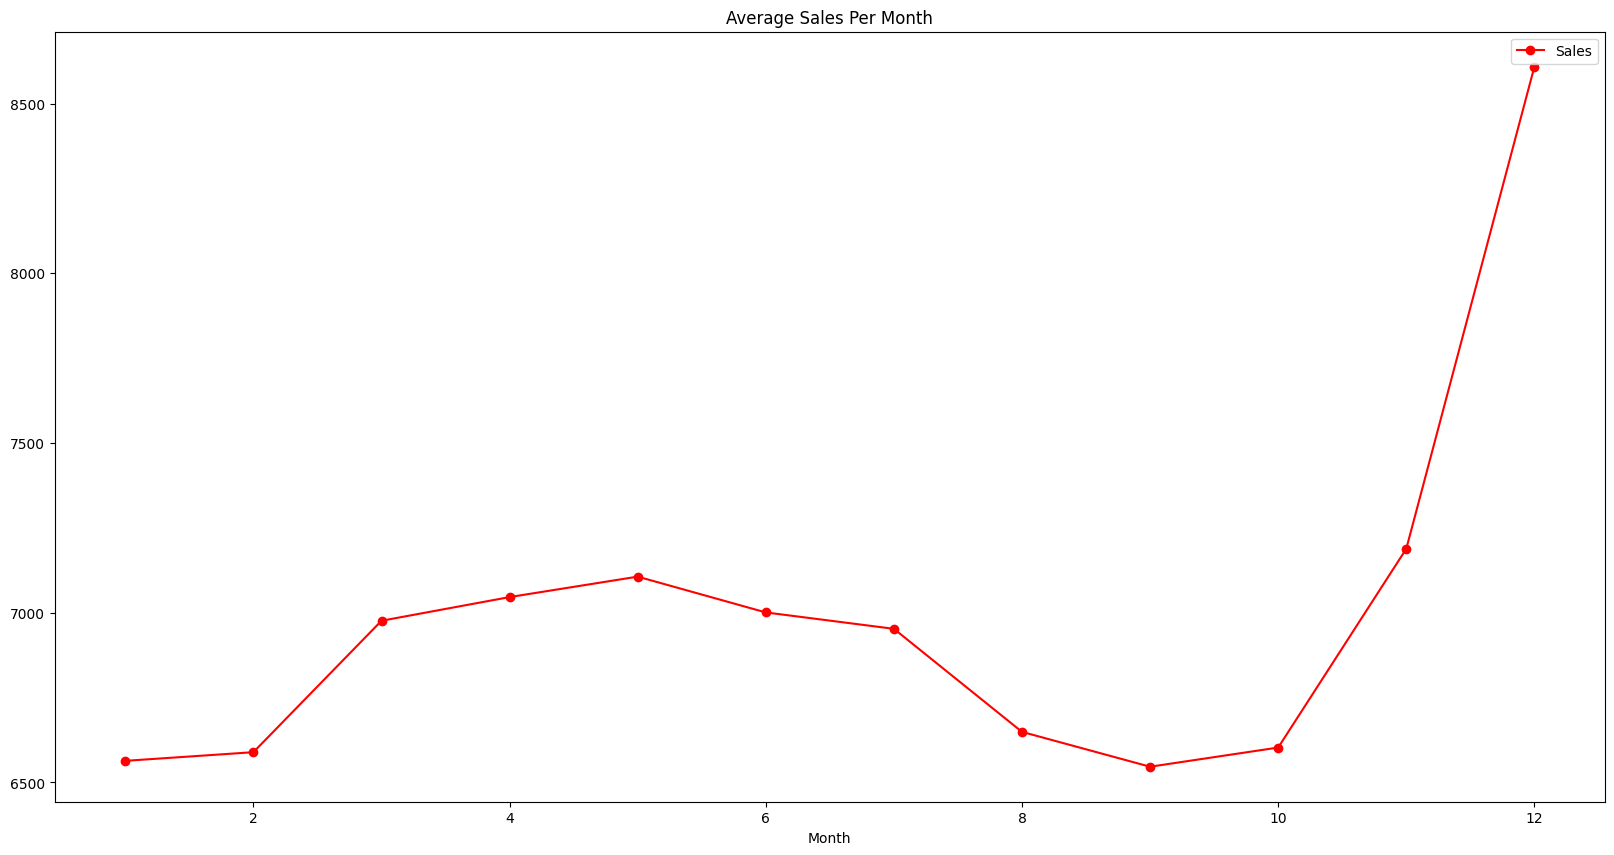

In [93]:
axis=sales_train_all_df.groupby('Month')[['Sales']].mean().plot(figsize=(20,10),marker='o',color='r')
axis.set_title('Average Sales Per Month')
plt.show()

#### Average Customer by Month

<Figure size 2000x1000 with 0 Axes>

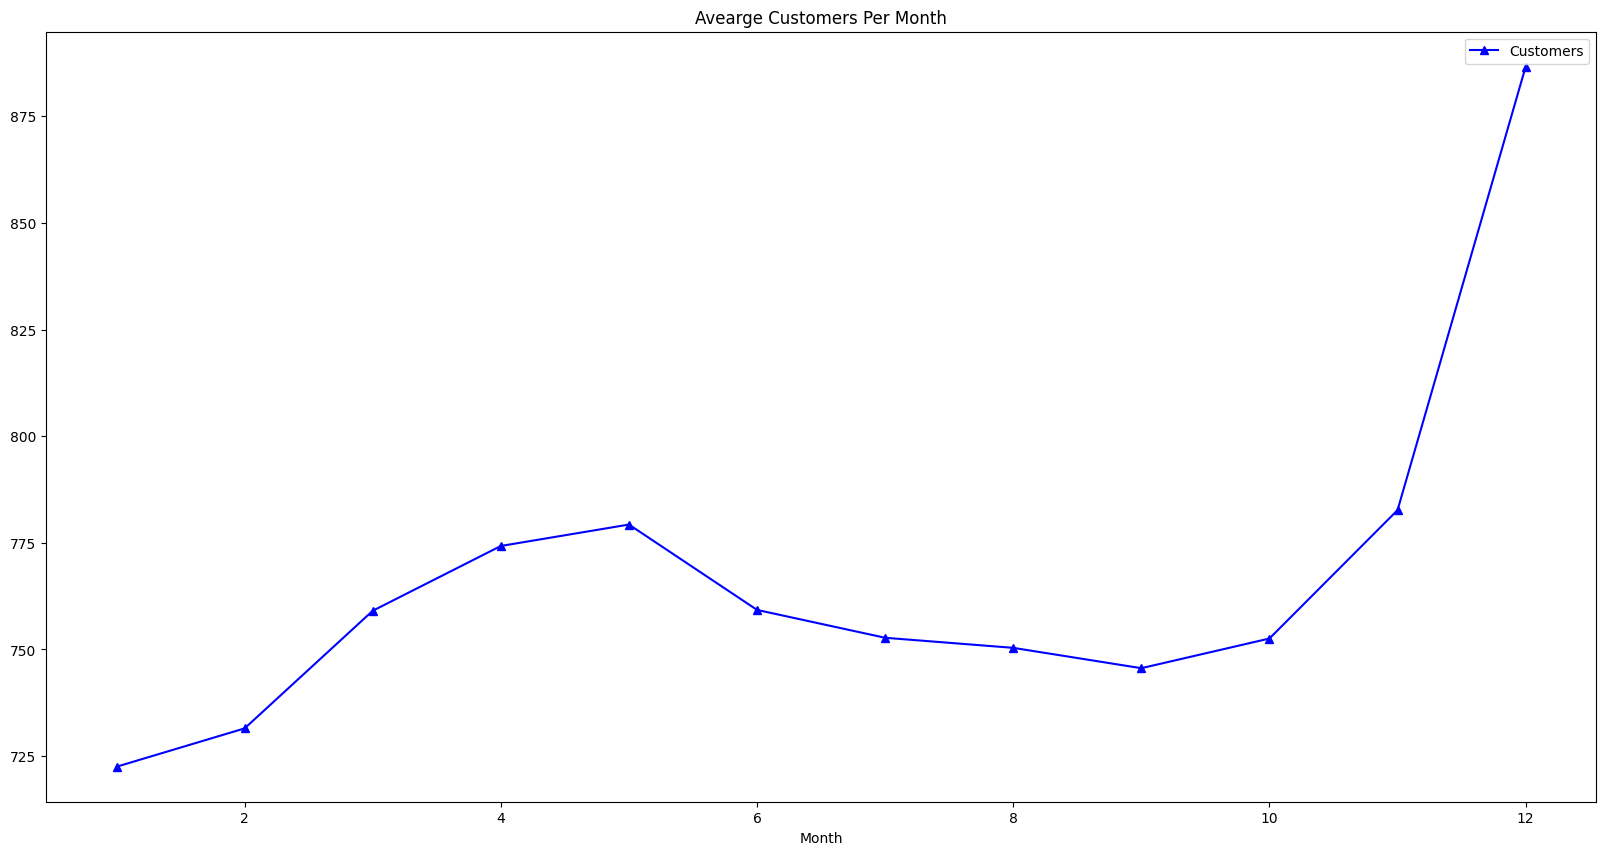

In [94]:
# It looks like number of customers peak around christmas timeframe
plt.figure()
axis=sales_train_all_df.groupby('Month')[['Customers']].mean().plot(figsize=(20,10),marker='^',color='b')
axis.set_title('Avearge Customers Per Month')
plt.show()

#### Display the sales and customers per day of the month instead

In [97]:
# Minimum number of customers are generally around the 24th of the month
# Most customers and sales are around 30th and 1st of the month
ax=sales_train_all_df.groupby('Day')[['Sales']].mean().plot(figsize=(20,5),marker='o',color='r')
axis.set_title('Avearge Sales Per Day')

Text(0.5, 1.0, 'Avearge Sales Per Day')

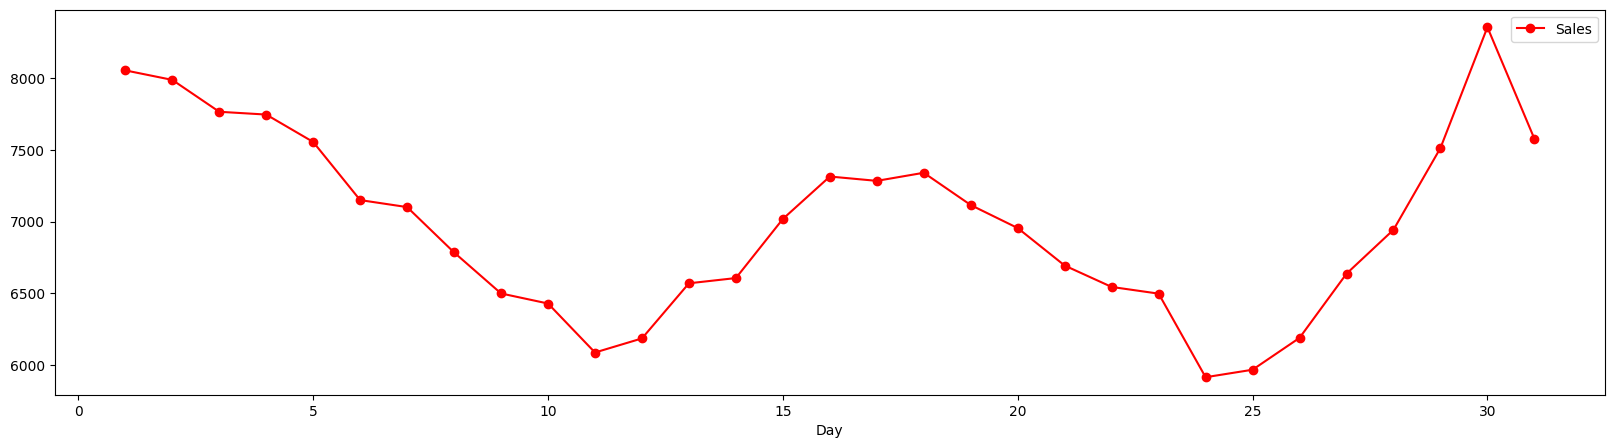

<Figure size 2000x1000 with 0 Axes>

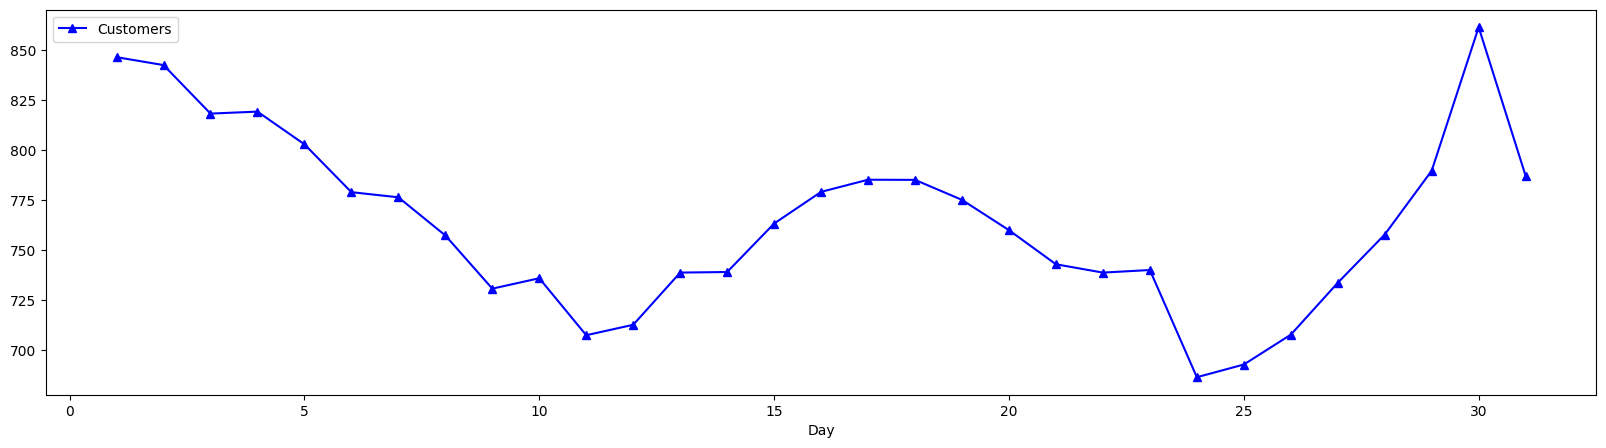

In [98]:
plt.figure()
ax = sales_train_all_df.groupby('Day')[['Customers']].mean().plot(figsize = (20,5), marker = '^', color = 'b')
axis.set_title('Average Sales Per Day')
plt.show()

#### Display the sales and customers based on day of the week 

In [ ]:
# Display the sales and customers for the day of the week (note that 7 = Sunday)

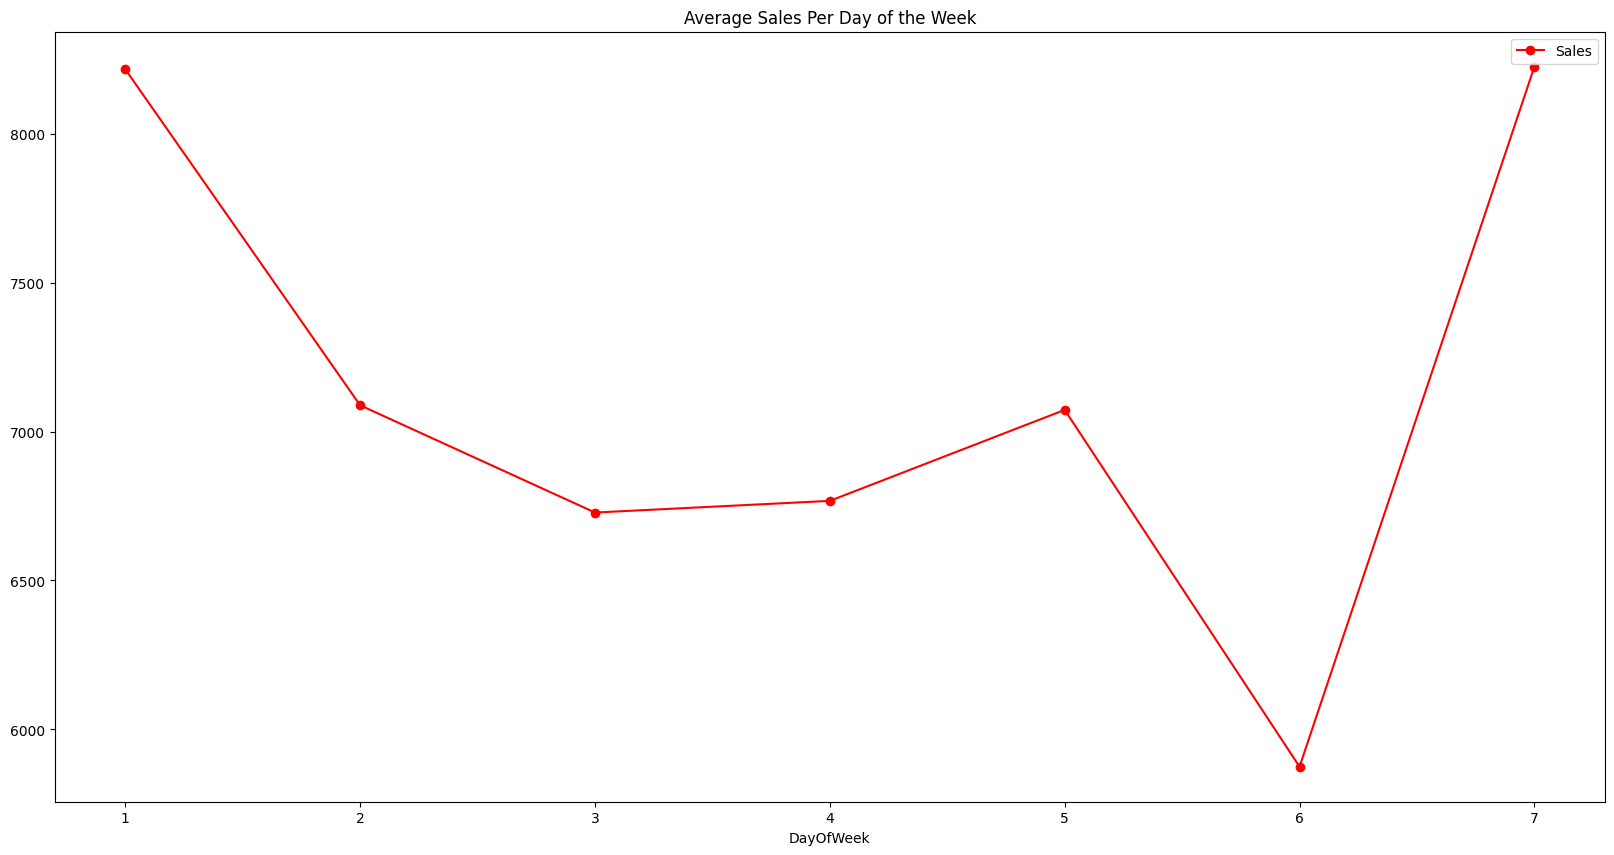

<Figure size 2000x1000 with 0 Axes>

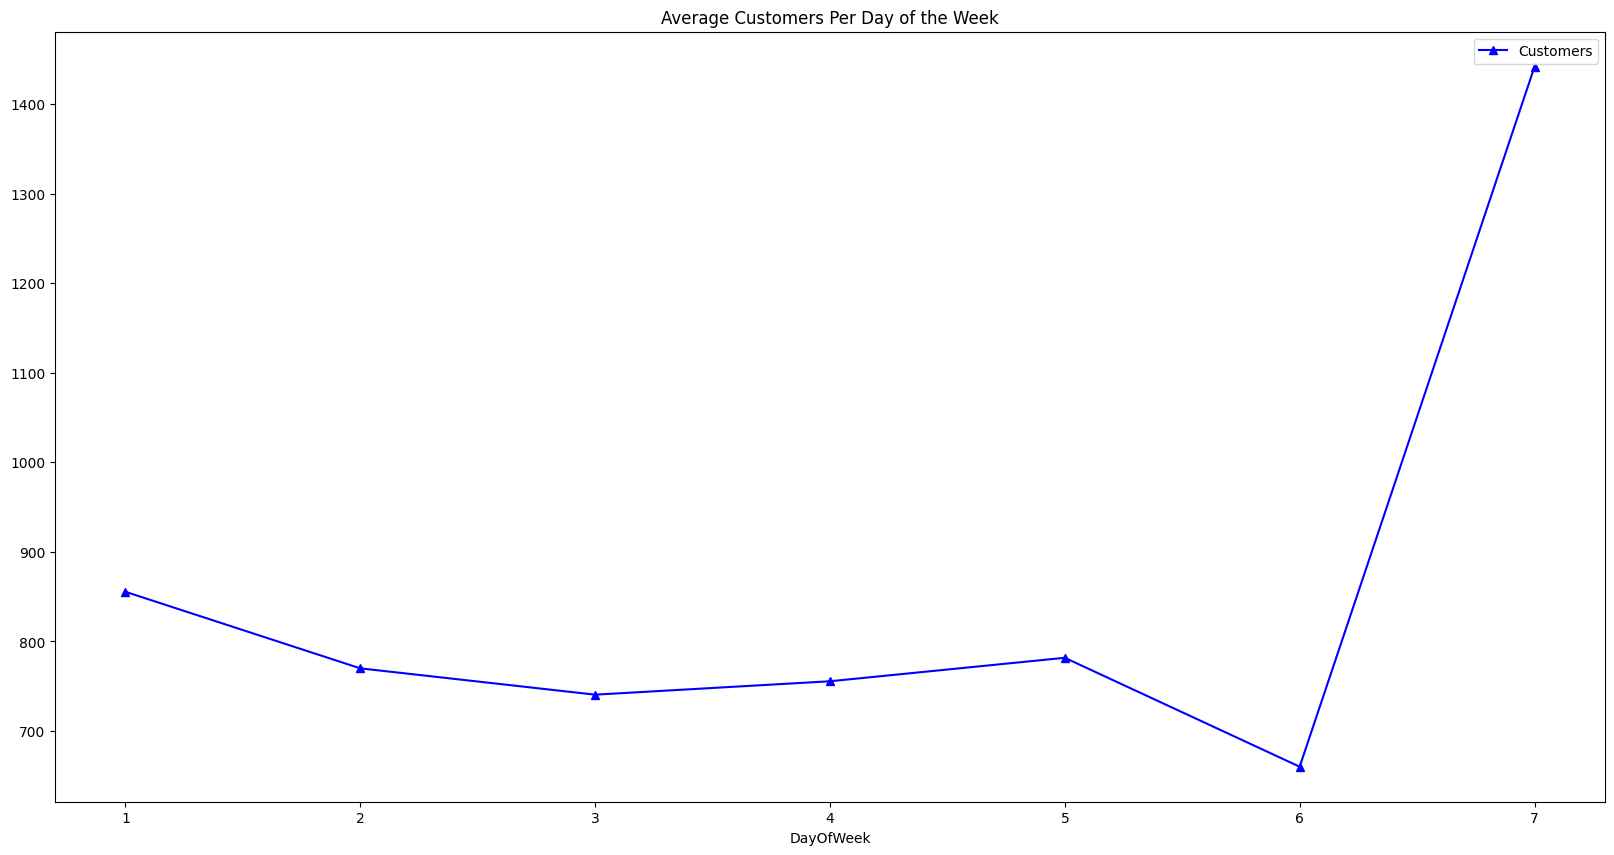

In [99]:
axis = sales_train_all_df.groupby('DayOfWeek')[['Sales']].mean().plot(figsize = (20,10), marker = 'o', color = 'r')
axis.set_title('Average Sales Per Day of the Week')

plt.figure()
axis = sales_train_all_df.groupby('DayOfWeek')[['Customers']].mean().plot(figsize = (20,10), marker = '^', color = 'b')
axis.set_title('Average Customers Per Day of the Week')
plt.show()

#### Average Sales by Store Type by Day (Store Type : a,b,c,d)

In [106]:
print(sales_train_all_df[['Sales']].dtypes)
print(sales_train_all_df['Sales'].unique())


Sales    int64
dtype: object
[ 5263  6064  8314 ...   660 17815 23303]


In [107]:
sales_train_all_df['Sales'] = pd.to_numeric(sales_train_all_df['Sales'], errors='coerce')

In [108]:
print(sales_train_all_df[sales_train_all_df['Sales'].isna()])

Empty DataFrame
Columns: [Store, DayOfWeek, Date, Sales, Customers, Promo, StateHoliday, SchoolHoliday, StoreType, Assortment, CompetitionDistance, CompetitionOpenSinceMonth, CompetitionOpenSinceYear, Promo2, Promo2SinceWeek, Promo2SinceYear, PromoInterval, Year, Month, Day]
Index: []


In [109]:
sales_train_all_df.dropna(subset=['Sales'], inplace=True)

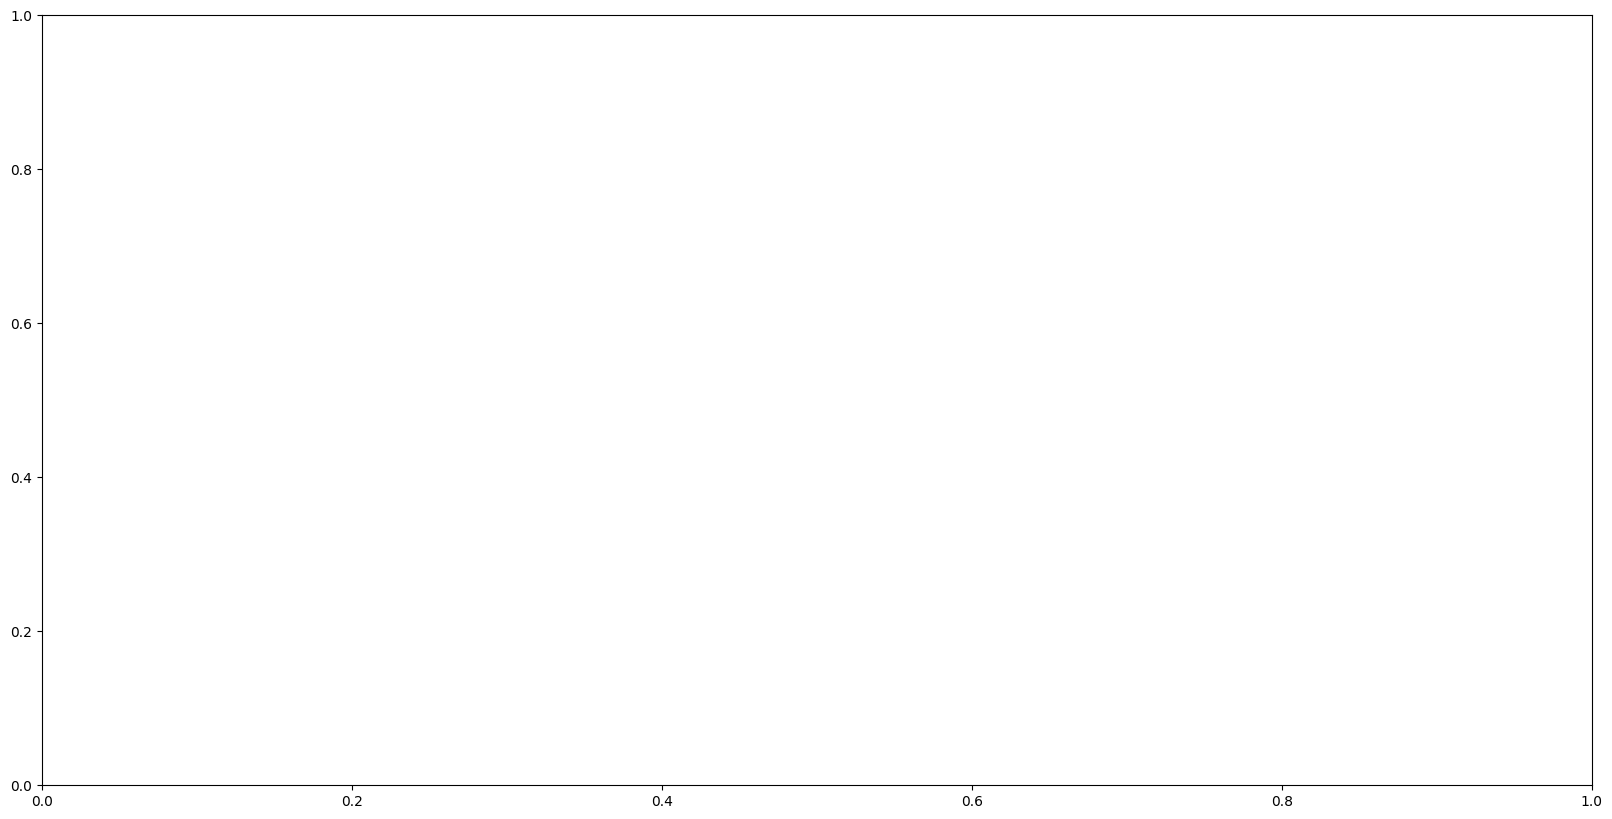

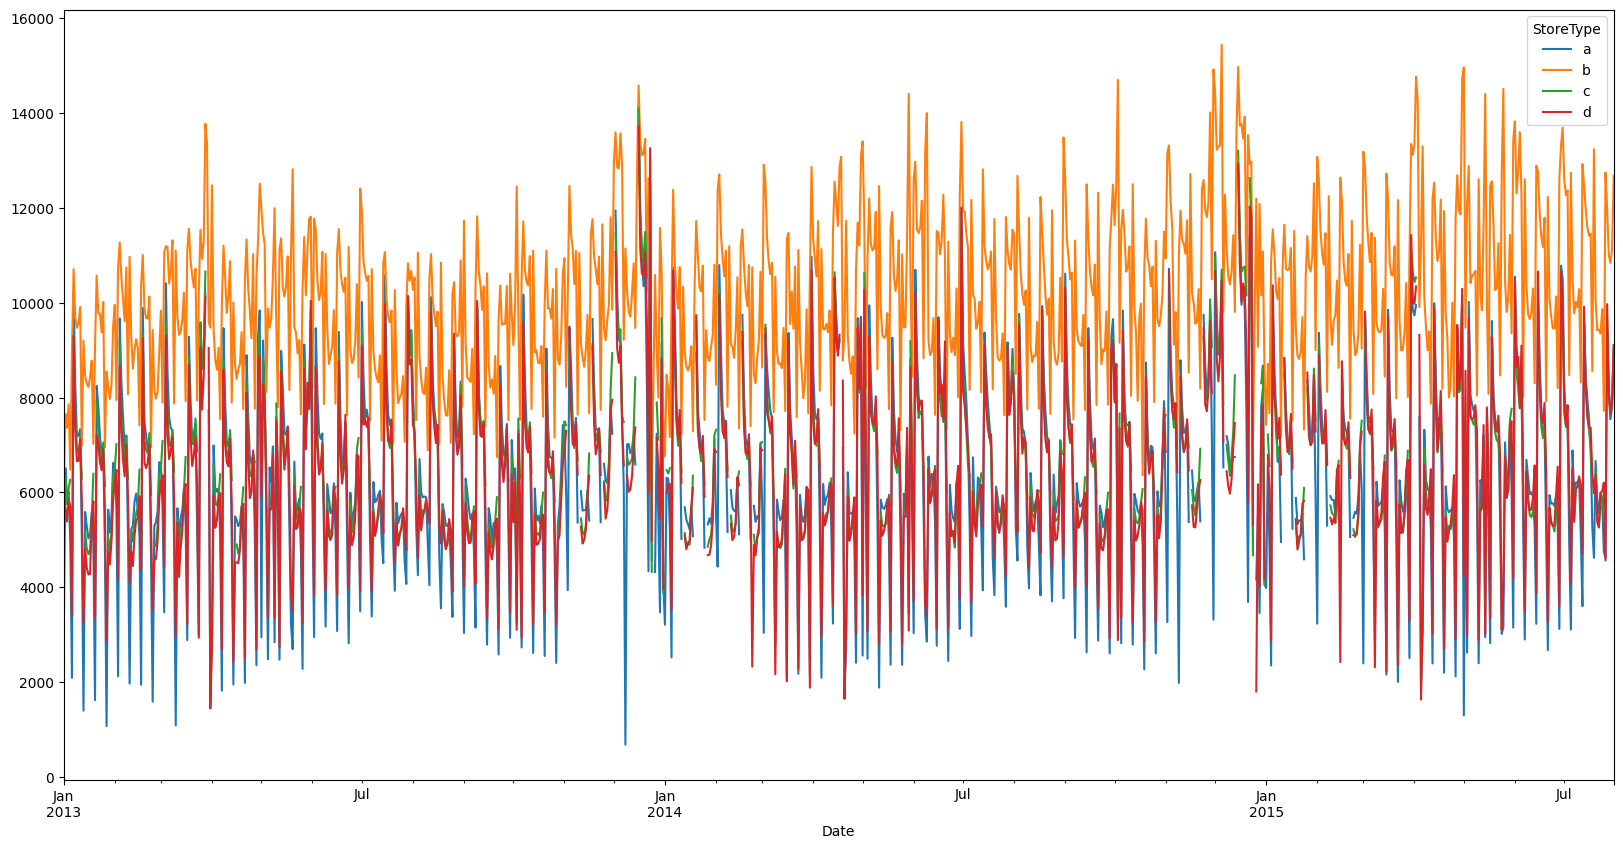

In [110]:
fig, ax = plt.subplots(figsize=(20,10))
sales_train_all_df.groupby(['Date','StoreType'])['Sales'].mean().unstack().plot(ax=ax)
plt.show()

#### Average Sales by Store Type by Day without unstack 

In [112]:
# Plot the above graph without unstack 
print(sales_train_all_df[['Sales']].dtypes)  # Check data type
print(sales_train_all_df['Sales'].unique())  # Display unique values

Sales    int64
dtype: object
[ 5263  6064  8314 ...   660 17815 23303]


In [114]:
sales_train_all_df['Sales'] = pd.to_numeric(sales_train_all_df['Sales'], errors='coerce')

In [115]:
sales_train_all_df.dropna(subset=['Sales'], inplace=True)

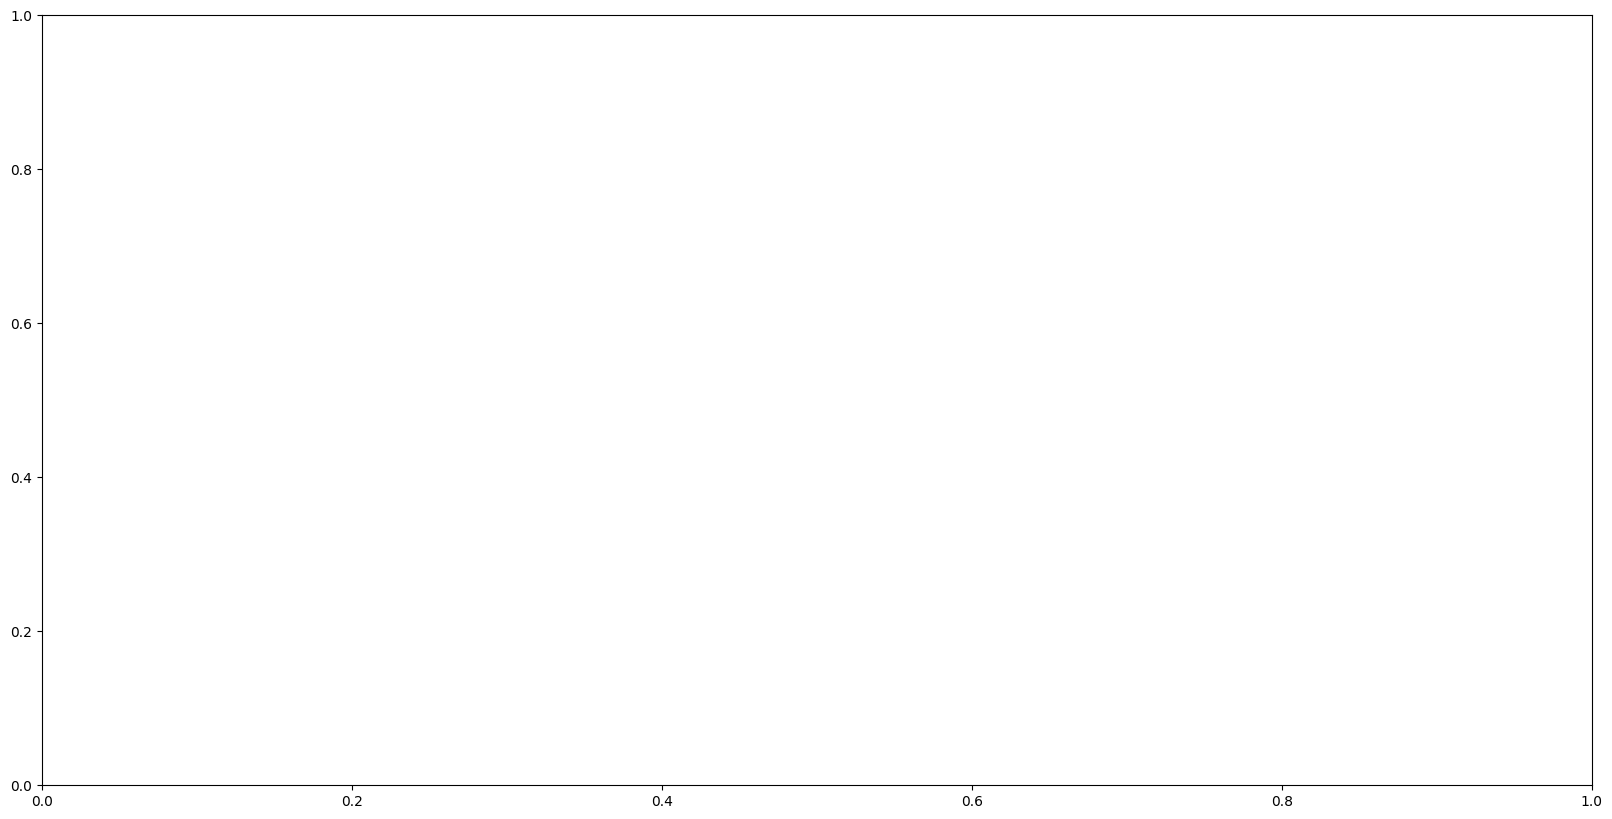

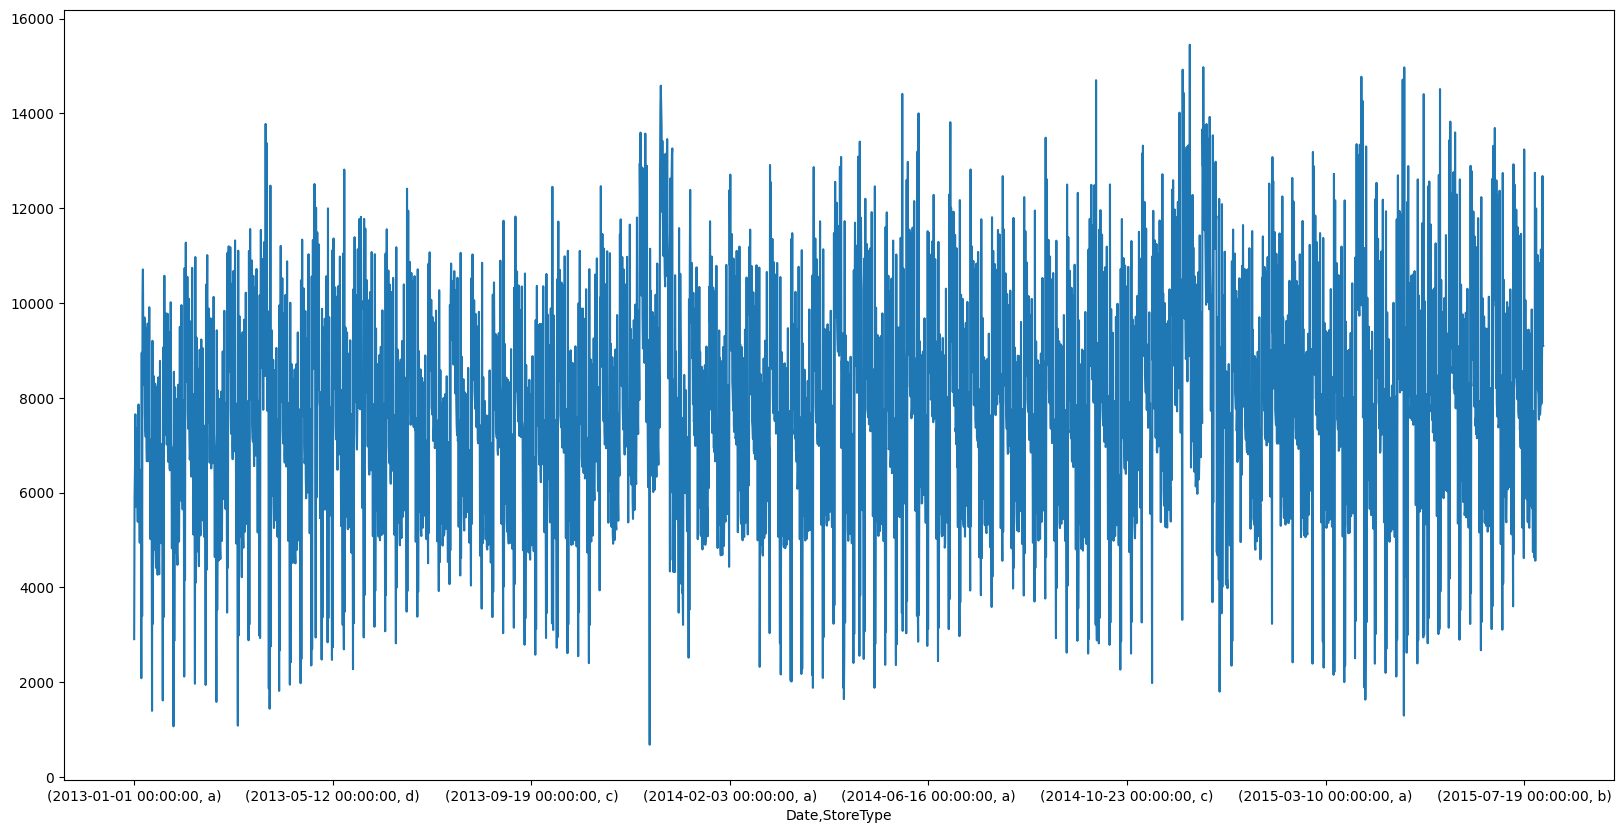

In [116]:
fig, ax = plt.subplots(figsize=(20,10))

# Group by Date and StoreType, compute mean of Sales, and plot
sales_train_all_df.groupby(['Date', 'StoreType'])['Sales'].mean().plot(ax=ax)

plt.show()

#### Graph – Impact of Promo on Sales and Customers – Bar Graph 

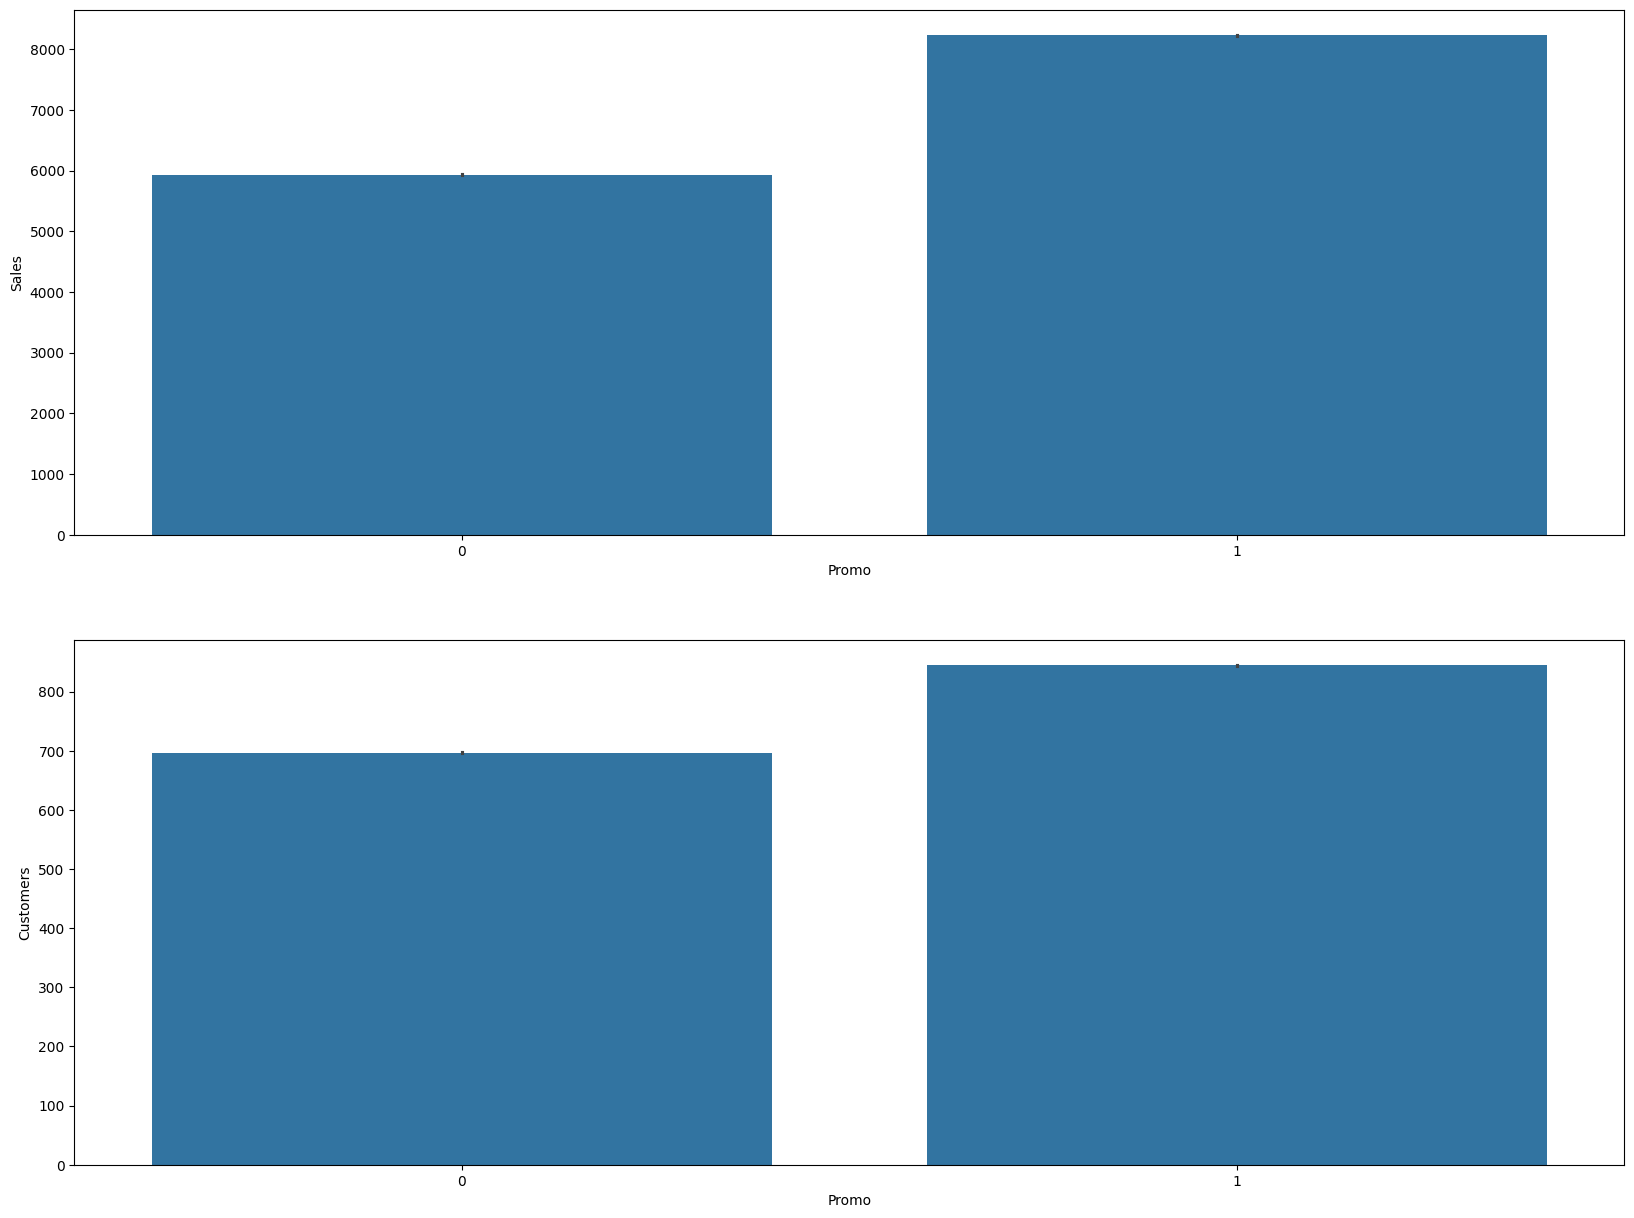

In [119]:
plt.figure(figsize=[20,15])
plt.subplot(211)
sns.barplot(x = 'Promo', y = 'Sales', data = sales_train_all_df)
plt.subplot(212)
sns.barplot(x = 'Promo', y = 'Customers', data = sales_train_all_df) 
plt.show()

#### Graph – Impact of Promo on Sales and Customers – violinplot

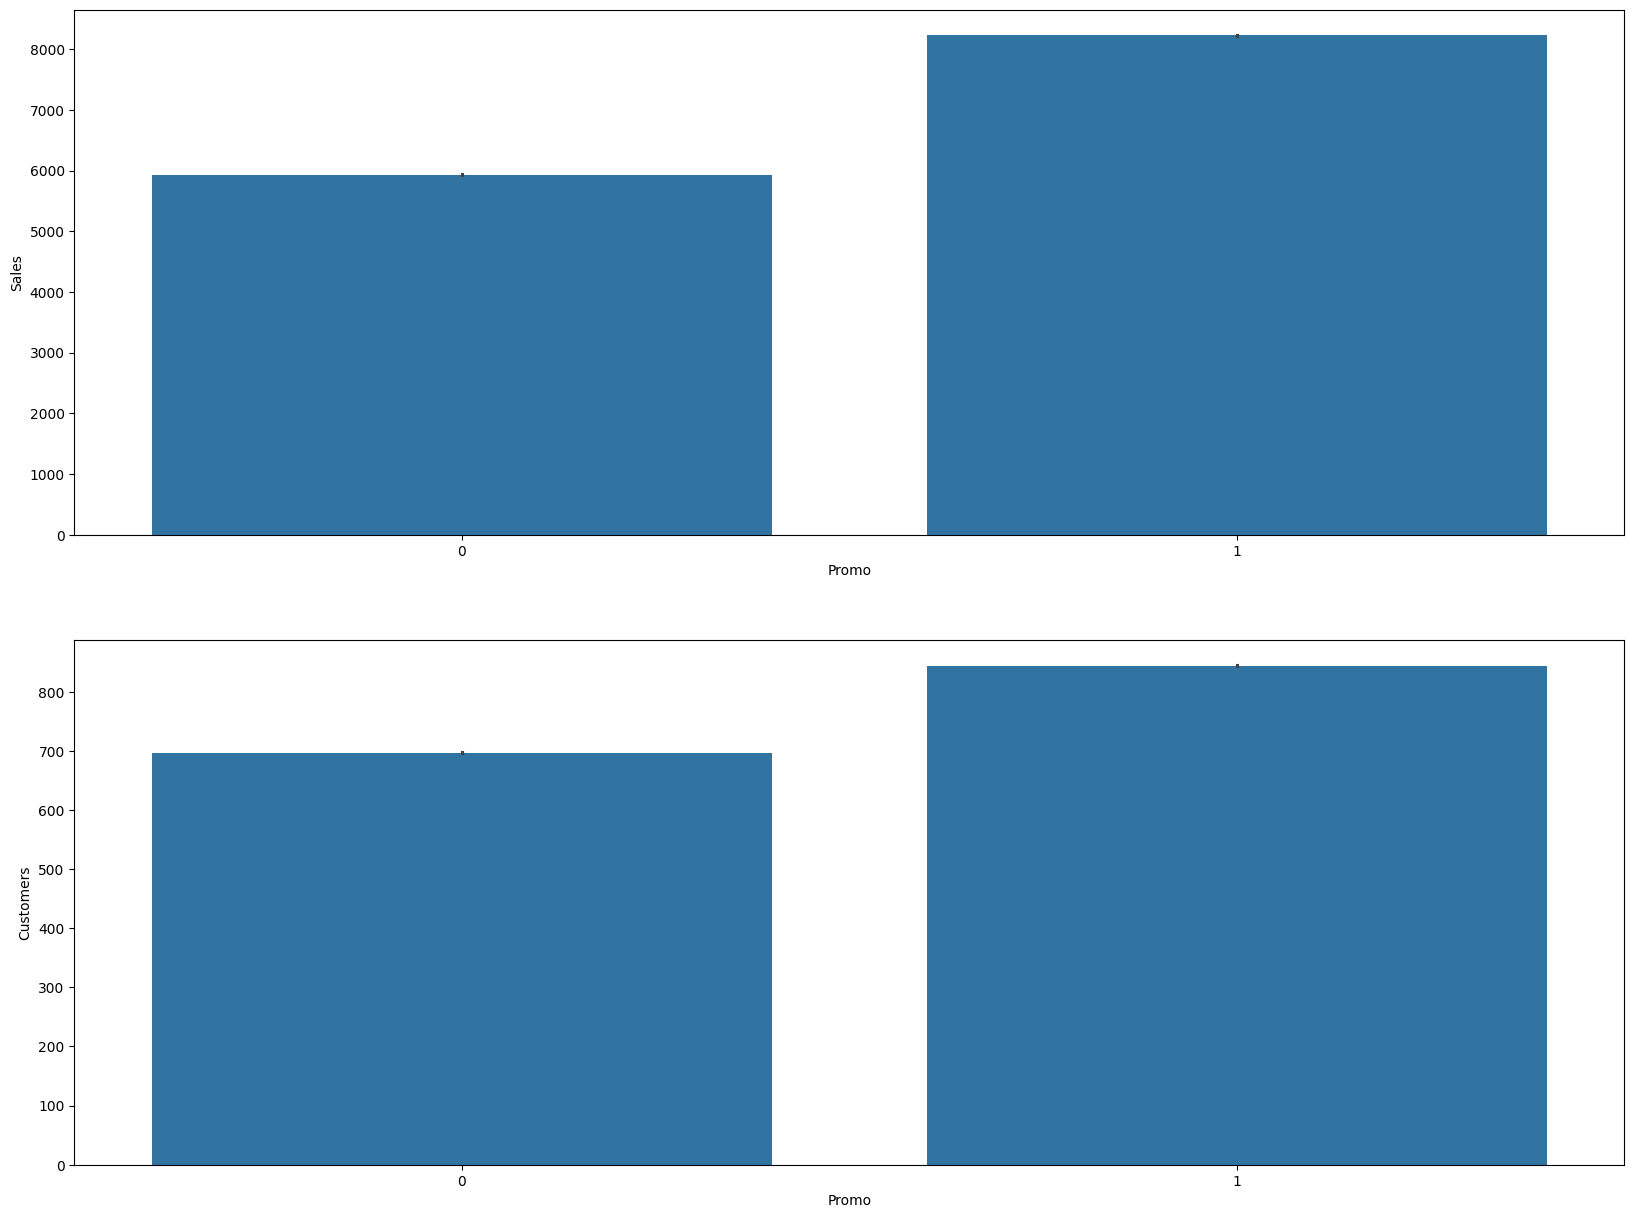

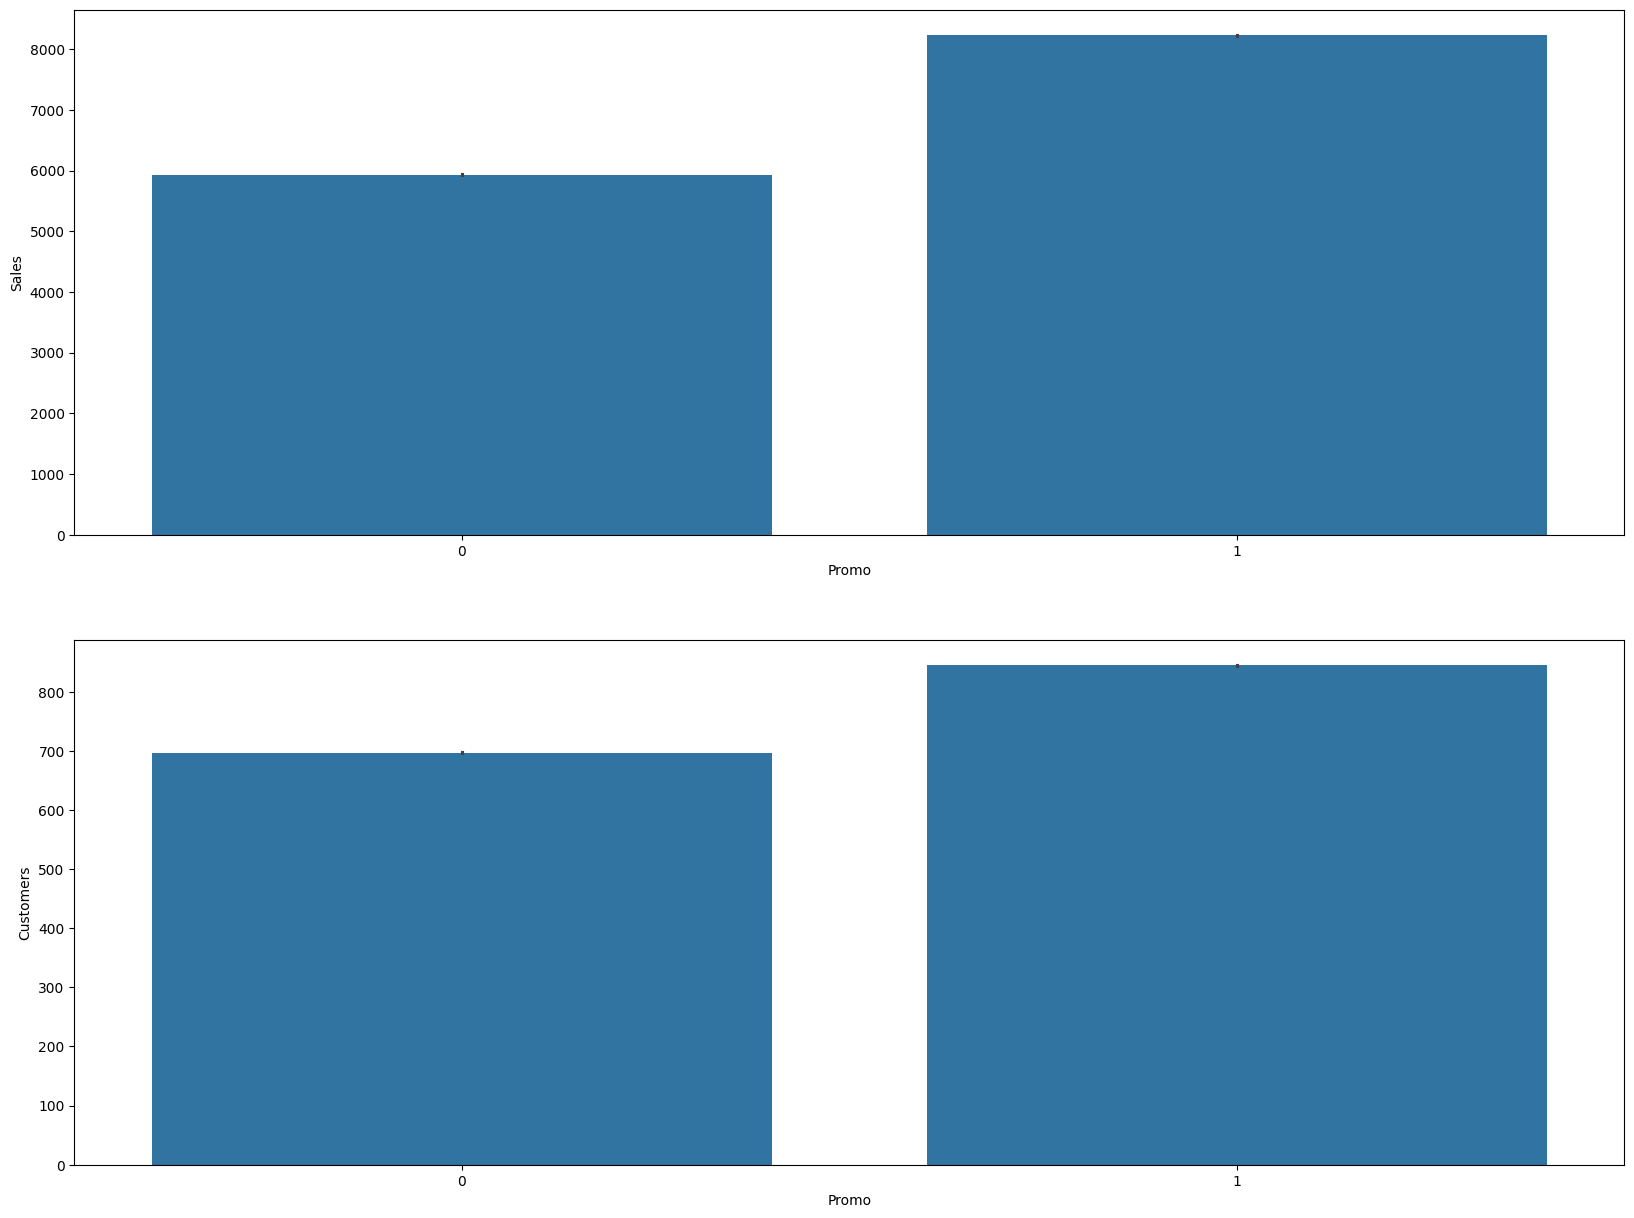

In [118]:
plt.figure(figsize=[20,15])
plt.subplot(211)
sns.barplot(x = 'Promo', y = 'Sales', data = sales_train_all_df)
plt.subplot(212)
sns.barplot(x = 'Promo', y = 'Customers', data = sales_train_all_df) 
plt.show()

#### Graph – Impact of Promo on Sales and Customers – Boxplot

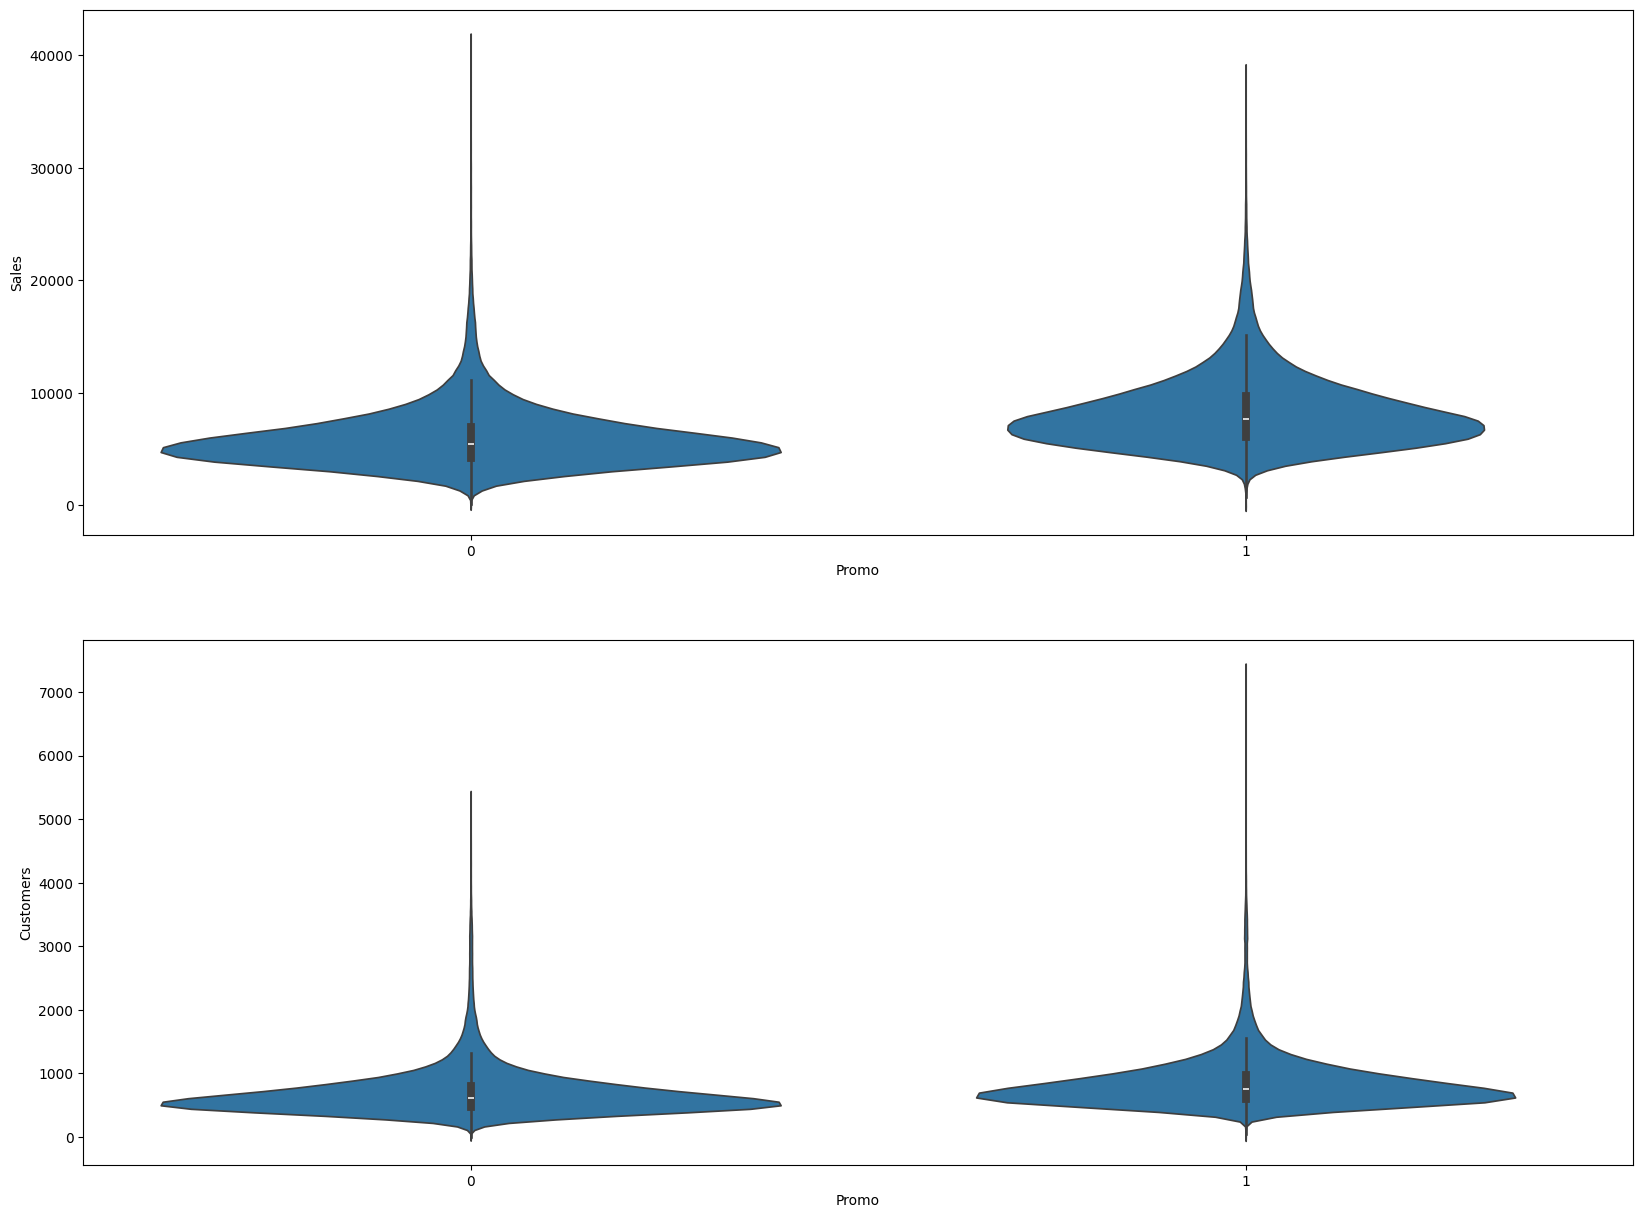

In [120]:
plt.figure(figsize=[20,15])
plt.subplot(211)
sns.violinplot(x = 'Promo', y = 'Sales', data = sales_train_all_df)
plt.subplot(212)
sns.violinplot(x = 'Promo', y = 'Customers', data = sales_train_all_df)
plt.show()

# TRAIN THE MODEL

#### Import Library 

In [127]:
from prophet import Prophet

#### Create the Function for Forecasting, prediction based on the specified store ie store id 

In [128]:
def sales_prediction(Store_ID, sales_df, periods):
  # Function that takes in the data frame, storeID, and number of future period forecast
  # The function then generates date/sales columns in Prophet format ie Rename Date column to ds and Sales to y
  # The function then makes time series predictions

    sales_df = sales_df[ sales_df['Store'] == Store_ID ]
# Create the data frame by selecting the data based on selected store id 
    sales_df = sales_df[['Date', 'Sales']].rename(columns = {'Date': 'ds', 'Sales':'y'})
# Rename the column  

    sales_df = sales_df.sort_values('ds')
  
    model    = Prophet() # Create the model 
    model.fit(sales_df)
    future   = model.make_future_dataframe(periods=periods)
    forecast = model.predict(future)
    figure   = model.plot(forecast, xlabel='Date', ylabel='Sales')
    figure2  = model.plot_components(forecast)

#### Call the function to predict for next 60 periods 

18:32:32 - cmdstanpy - INFO - Chain [1] start processing
18:32:32 - cmdstanpy - INFO - Chain [1] done processing


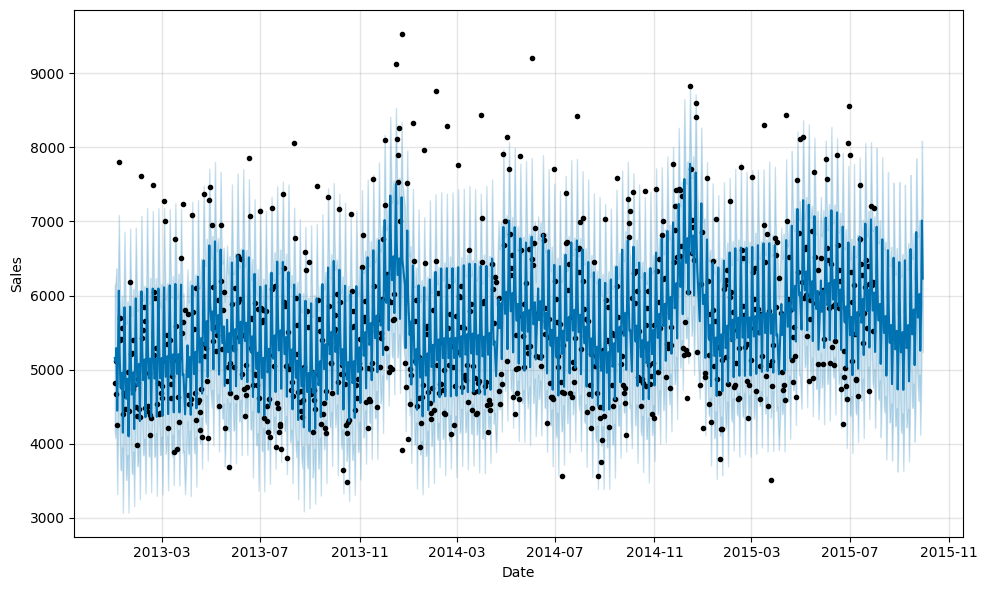

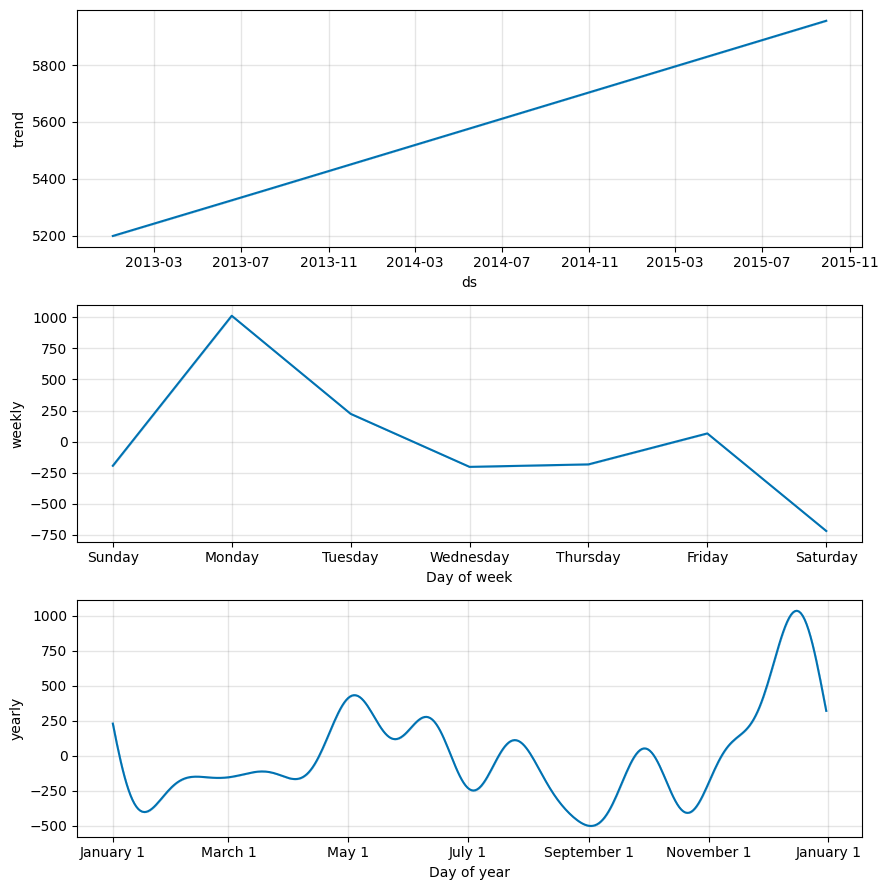

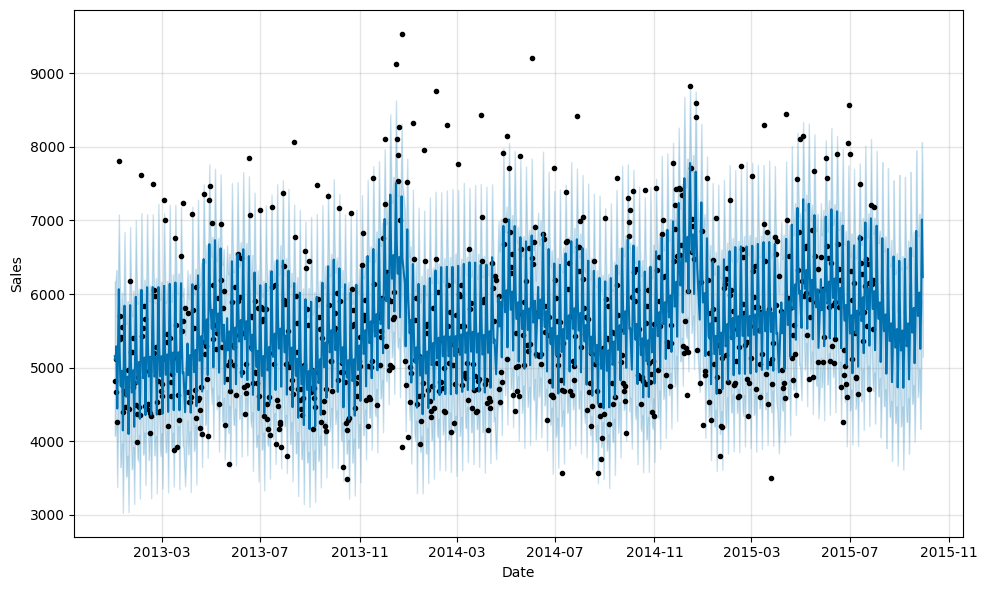

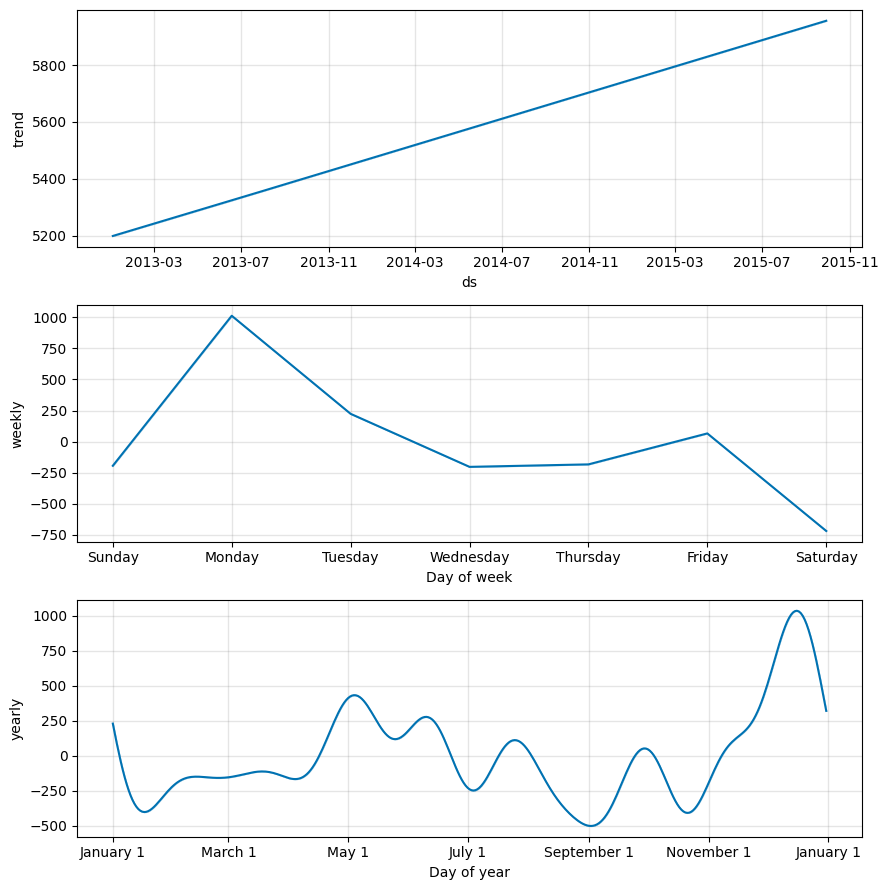

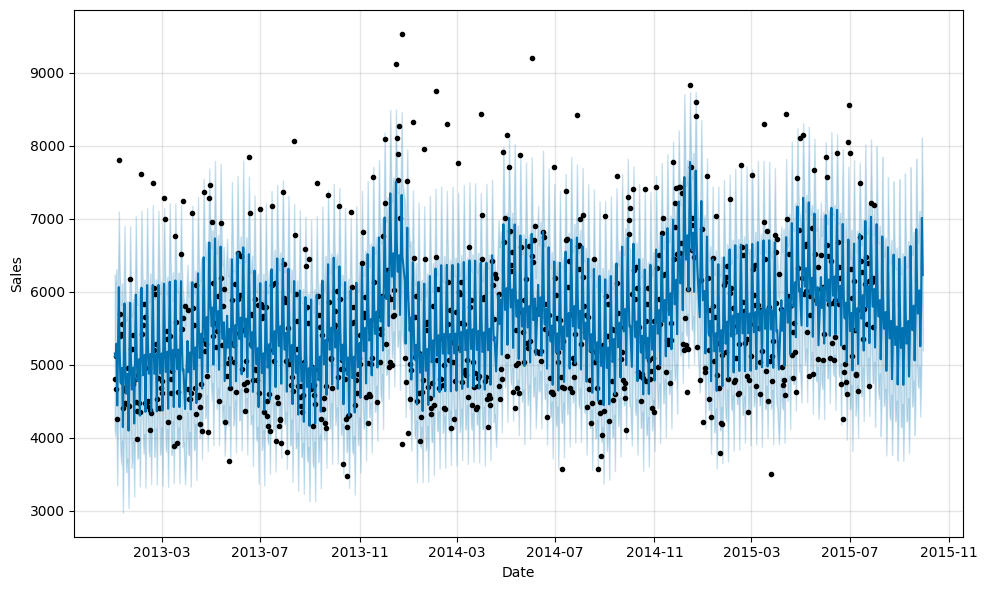

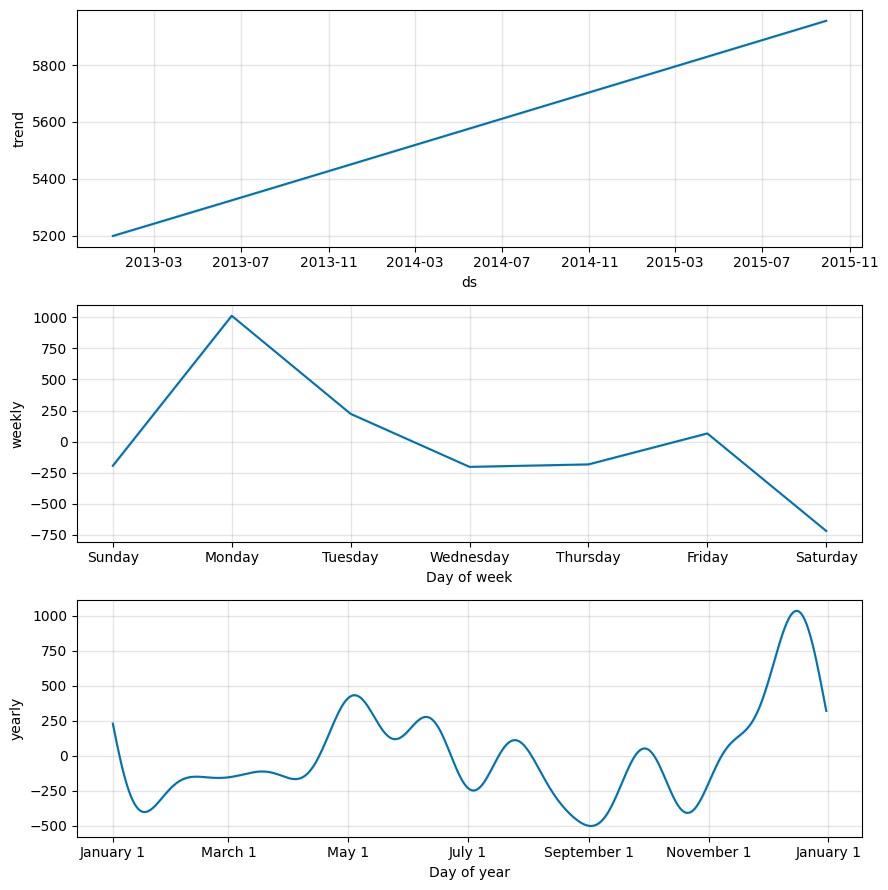

In [131]:
import matplotlib.pyplot as plt

sales_prediction(10, sales_train_all_df, 60)
plt.show()

#### Predict the sales for next 60 days for store 6 on State Holiday and School Holiday 
#### •	State Holiday: indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
#### •	School Holiday: indicates if the (Store, Date) was affected by the closure of public schools


#### Updated Function to predict on Holidays- Included one more input holidays

In [132]:
def sales_prediction(Store_ID, sales_df, holidays, periods):
  # Function that takes in the storeID and returns two date/sales columns in Prophet format
  # Format data to fit prophet 

  sales_df = sales_df[ sales_df['Store'] == Store_ID ]
  sales_df = sales_df[['Date', 'Sales']].rename(columns = {'Date': 'ds', 'Sales':'y'})
  sales_df = sales_df.sort_values('ds')
  
  model    = Prophet(holidays = holidays)
  model.fit(sales_df)
  future   = model.make_future_dataframe(periods = periods)
  forecast = model.predict(future)
  figure   = model.plot(forecast, xlabel='Date', ylabel='Sales')
  figure2  = model.plot_components(forecast)

#### Get all the dates related to school holidays 

In [133]:
school_holidays = sales_train_all_df[sales_train_all_df['SchoolHoliday'] == 1].loc[:, 'Date'].values
display (school_holidays.shape)

(163457,)

#### Print school holidays 

In [134]:
display(school_holidays)

array(['2015-07-31T00:00:00.000000000', '2015-07-31T00:00:00.000000000',
       '2015-07-31T00:00:00.000000000', ...,
       '2013-01-01T00:00:00.000000000', '2013-01-01T00:00:00.000000000',
       '2013-01-01T00:00:00.000000000'], dtype='datetime64[ns]')

#### Get all the dates related to state holidays 

In [135]:
state_holidays = sales_train_all_df [ (sales_train_all_df['StateHoliday'] == 'a') | (sales_train_all_df['StateHoliday'] == 'b') | (sales_train_all_df['StateHoliday'] == 'c')  ].loc[:, 'Date'].values
display (state_holidays.shape)

(910,)

#### Print State Holidays 

In [136]:
state_holidays = pd.DataFrame({'ds': pd.to_datetime(state_holidays),
                               'holiday': 'state_holiday'})
display(state_holidays )

,ds,holiday
0,2015-06-04,state_holiday
1,2015-06-04,state_holiday
2,2015-06-04,state_holiday
3,2015-06-04,state_holiday
4,2015-06-04,state_holiday
...,...,...
905,2013-01-01,state_holiday
906,2013-01-01,state_holiday
907,2013-01-01,state_holiday
908,2013-01-01,state_holiday


#### Print School Holidays 

In [137]:
school_holidays = pd.DataFrame({'ds': pd.to_datetime(school_holidays),
                                'holiday': 'school_holiday'})
display (school_holidays)

,ds,holiday
0,2015-07-31,school_holiday
1,2015-07-31,school_holiday
2,2015-07-31,school_holiday
3,2015-07-31,school_holiday
4,2015-07-31,school_holiday
...,...,...
163452,2013-01-01,school_holiday
163453,2013-01-01,school_holiday
163454,2013-01-01,school_holiday
163455,2013-01-01,school_holiday


#### Display School and State Holidays 

In [138]:
# Concat state and scholl holidays
school_state_holidays = pd.concat((state_holidays, school_holidays))
display (school_state_holidays)

,ds,holiday
0,2015-06-04,state_holiday
1,2015-06-04,state_holiday
2,2015-06-04,state_holiday
3,2015-06-04,state_holiday
4,2015-06-04,state_holiday
...,...,...
163452,2013-01-01,school_holiday
163453,2013-01-01,school_holiday
163454,2013-01-01,school_holiday
163455,2013-01-01,school_holiday


#### Sales Prediction for 60 Day for School and state holidays 

In [ ]:
sales_prediction(6, sales_train_all_df, school_state_holidays, 60)

import matplotlib.pyplot as plt
plt.show()  # Forces plot display


18:45:24 - cmdstanpy - INFO - Chain [1] start processing
18:45:24 - cmdstanpy - INFO - Chain [1] done processing


18:41:34 - cmdstanpy - INFO - Chain [1] start processing
18:41:34 - cmdstanpy - INFO - Chain [1] done processing


None
